## <span style="color:blue">  Numerical exercises 4</span>

# Es 4.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling the **possibility** to **(re)start** reading not only a spatial configuration file but also a **previous spatial configuration file**</span> (files: <font face="Courier">previous_config.0</font> and <font face="Courier">previous_config.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities in the velocity file in order to match a desired temperature</span>.

This will help you, especially in the equilibration phases of your simulations.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

plt.style.use('classic')

In [2]:
runs = 4
print('Number of runs:', runs)

Number of runs: 4


In [3]:
element = 'General'
state = 'liquid'

In [4]:
temp_general = np.loadtxt(element + '/' + state +'/output_temp.dat')
kin_en_general = np.loadtxt(element + '/' + state +'/output_E_kin.dat')
pot_en_general = np.loadtxt(element + '/' + state +'/output_E_pot.dat')
tot_en_general = np.loadtxt(element + '/' + state +'/output_E_tot.dat')

x = np.arange(len(temp_general))

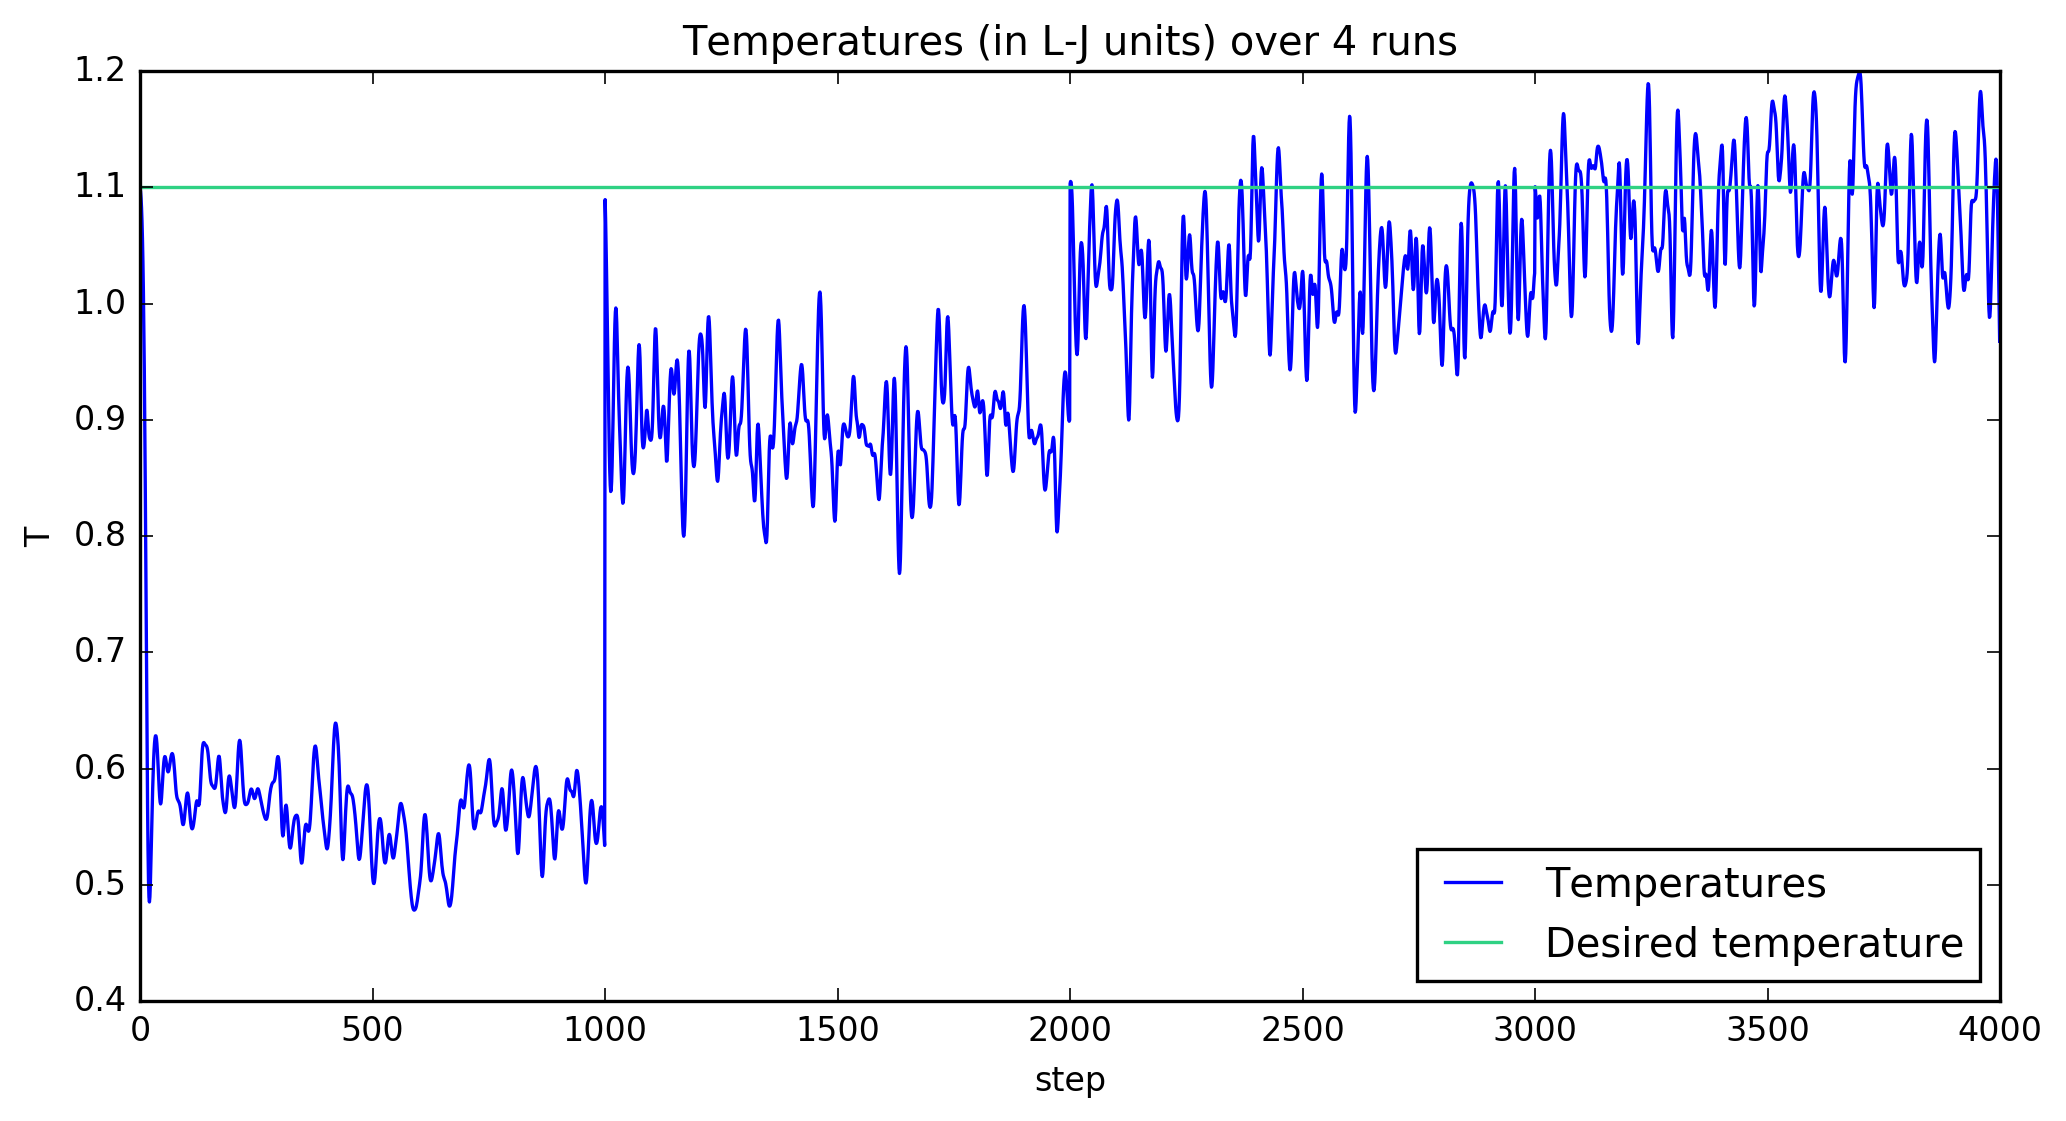

In [5]:
figure(num=None, figsize=(10, 5), dpi=240, facecolor='w', edgecolor='k')

plt.plot(x, temp_general, label='Temperatures', color='blue')
plt.axhline(1.1, label='Desired temperature', color='#2fd183')
plt.xlabel('step')
plt.ylabel('T')
plt.legend(loc='best')
plt.title('Temperatures (in L-J units) over %i runs' %runs)

plt.savefig('plots/41_temperatures.png')
plt.show()

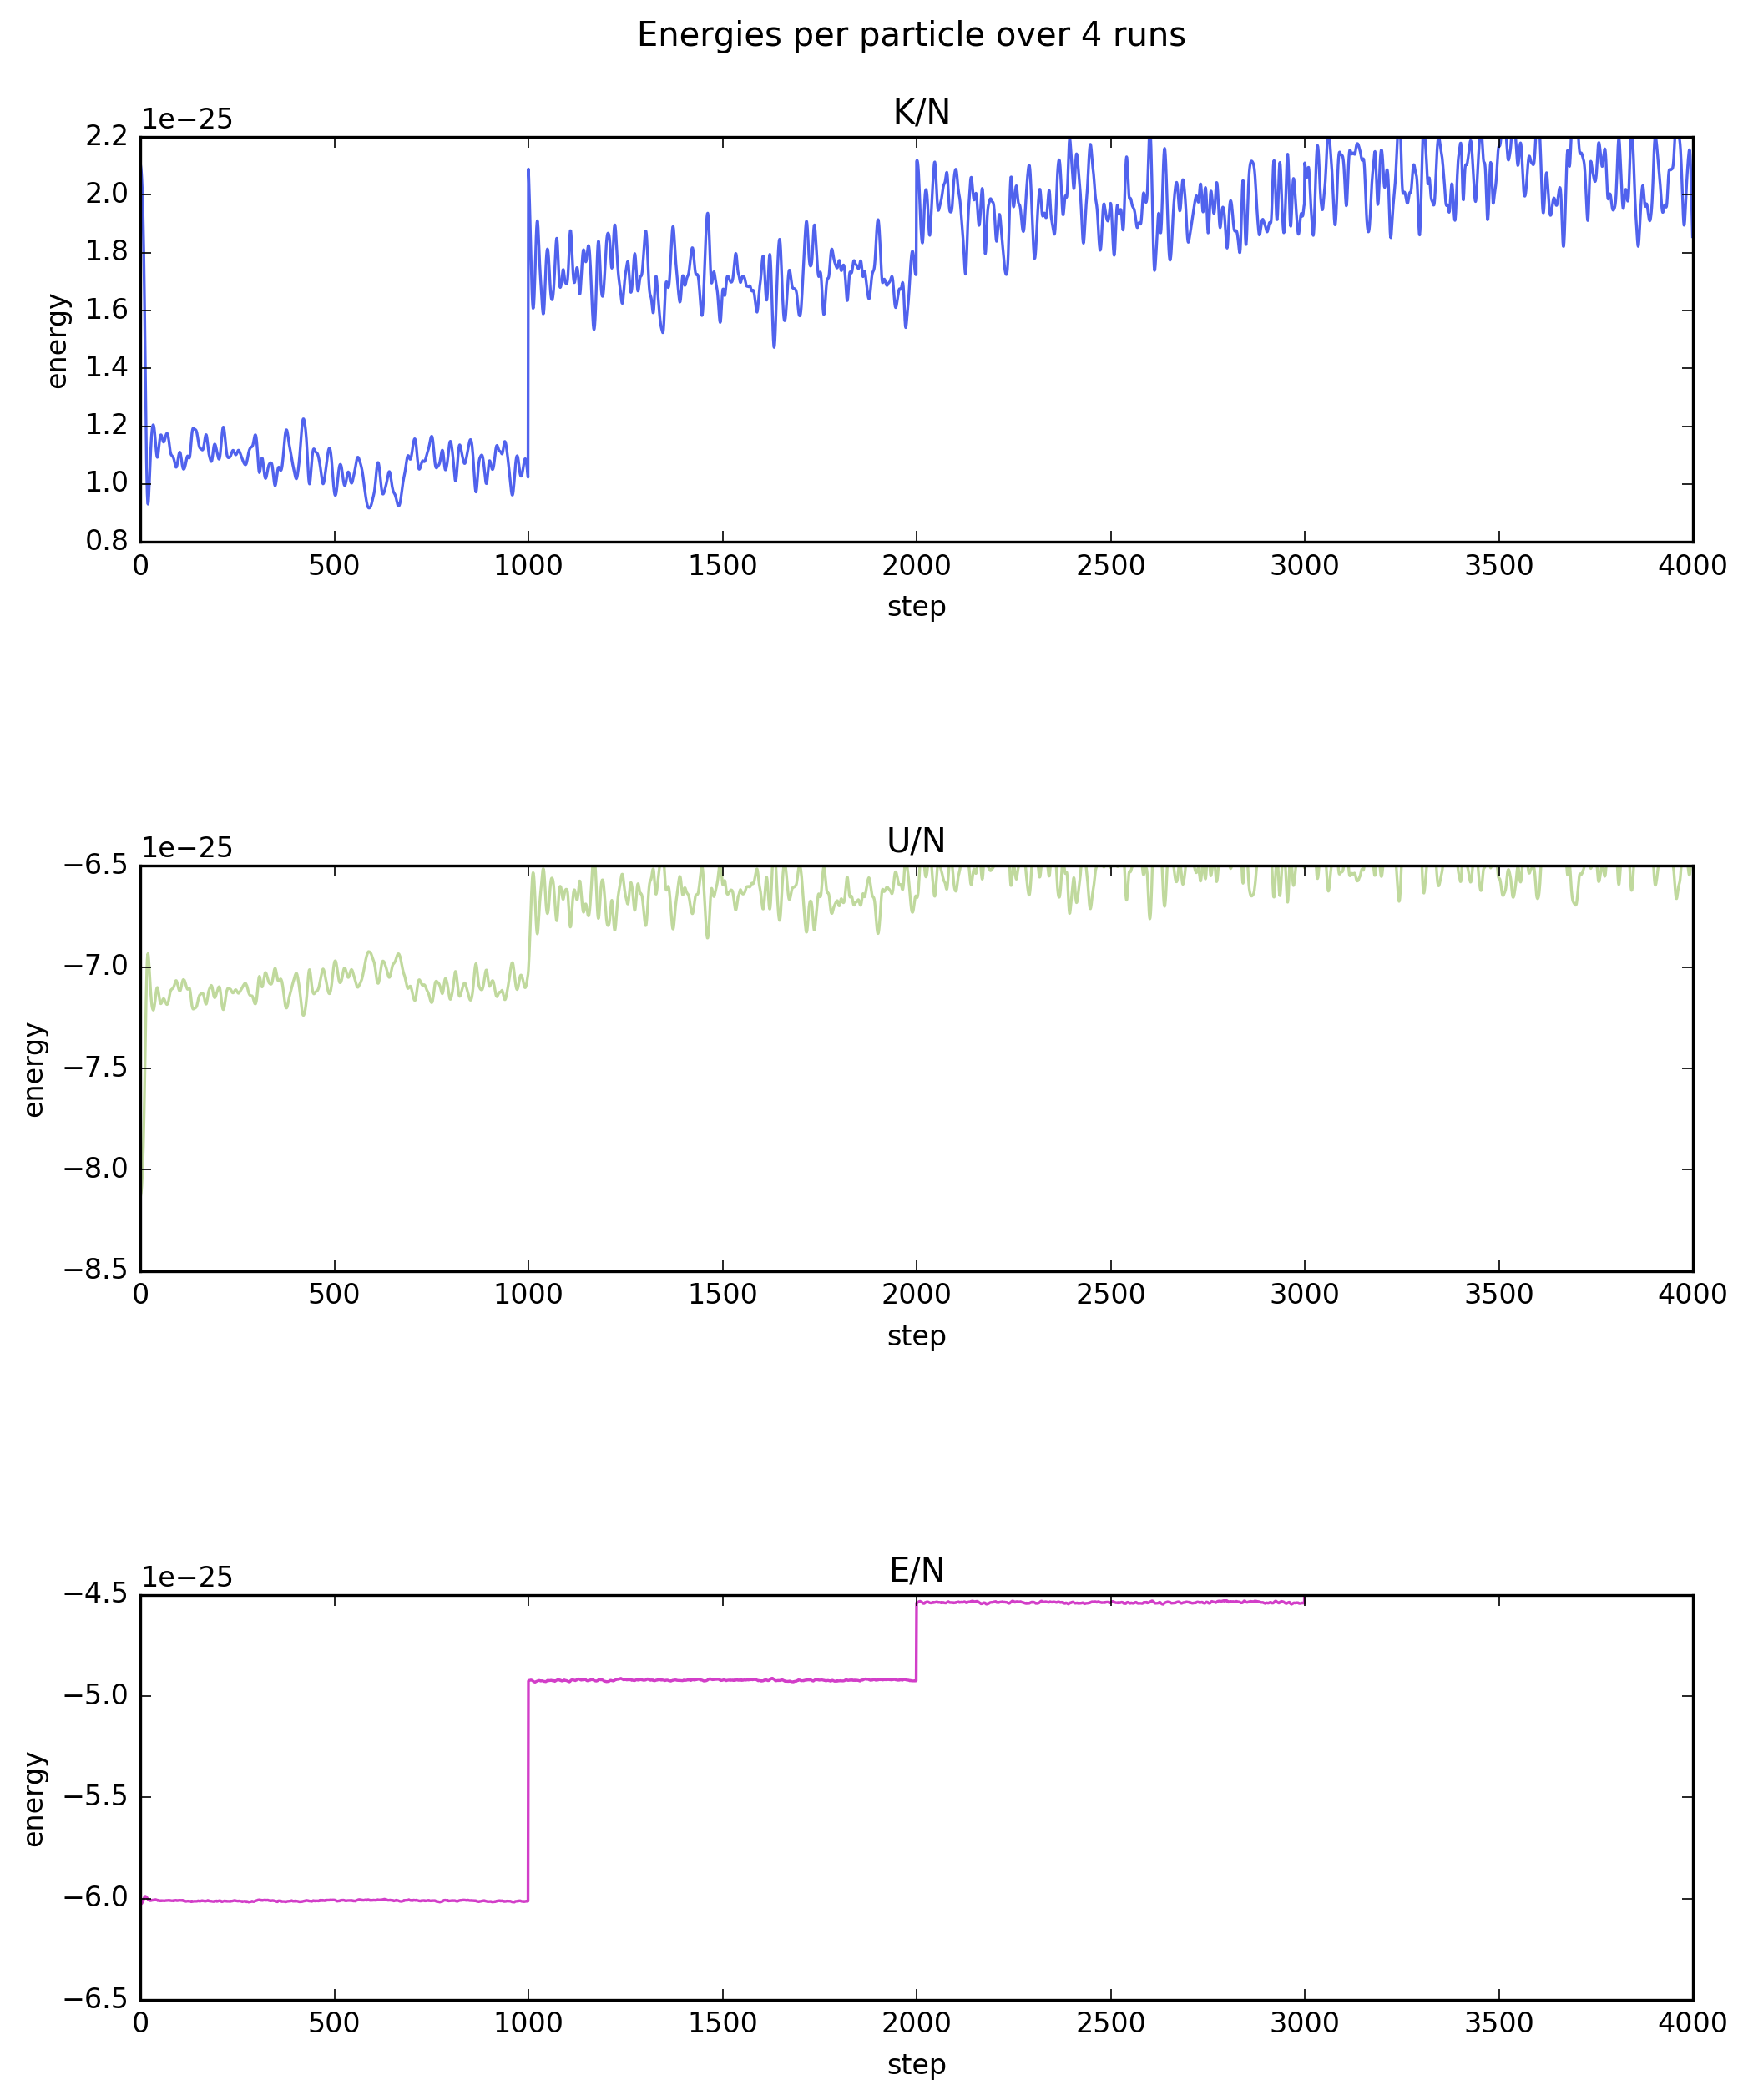

In [8]:
figure(num=None, figsize=(10, 12), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(311)
plt.plot(x, kin_en_general, label='Kinetic Energy ', color='#5062ed')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('Energies per particle over %i runs \n \n K/N' %runs)
plt.subplot(312)
plt.plot(x, pot_en_general, label='Potential Energy ', color='#c0d99d')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('U/N')
plt.subplot(313)
plt.plot(x, tot_en_general, label='Total Energy ', color='#d23ec8')
plt.title('E/N')

plt.subplots_adjust(hspace=0.8)

plt.xlabel('step')
plt.ylabel('energy')
plt.savefig('plots/energies_kripton.png')
plt.show()

***Domanda per prof***: come faccio a sistemare che alcuni grafici mi vanno "fuori"?

-----------

# Es 4.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

In [9]:
ave_kin_general = np.loadtxt(element + '/' + state +'/ave_ekin.out', skiprows=1)
x = np.arange(len(ave_kin_general))

ave_pot_general = np.loadtxt(element + '/' + state +'/ave_epot.out', skiprows=1)

ave_tot_general = np.loadtxt(element + '/' + state +'/ave_etot.out', skiprows=1)

ave_temp_general = np.loadtxt(element + '/' + state +'/ave_temp.out', skiprows=1)

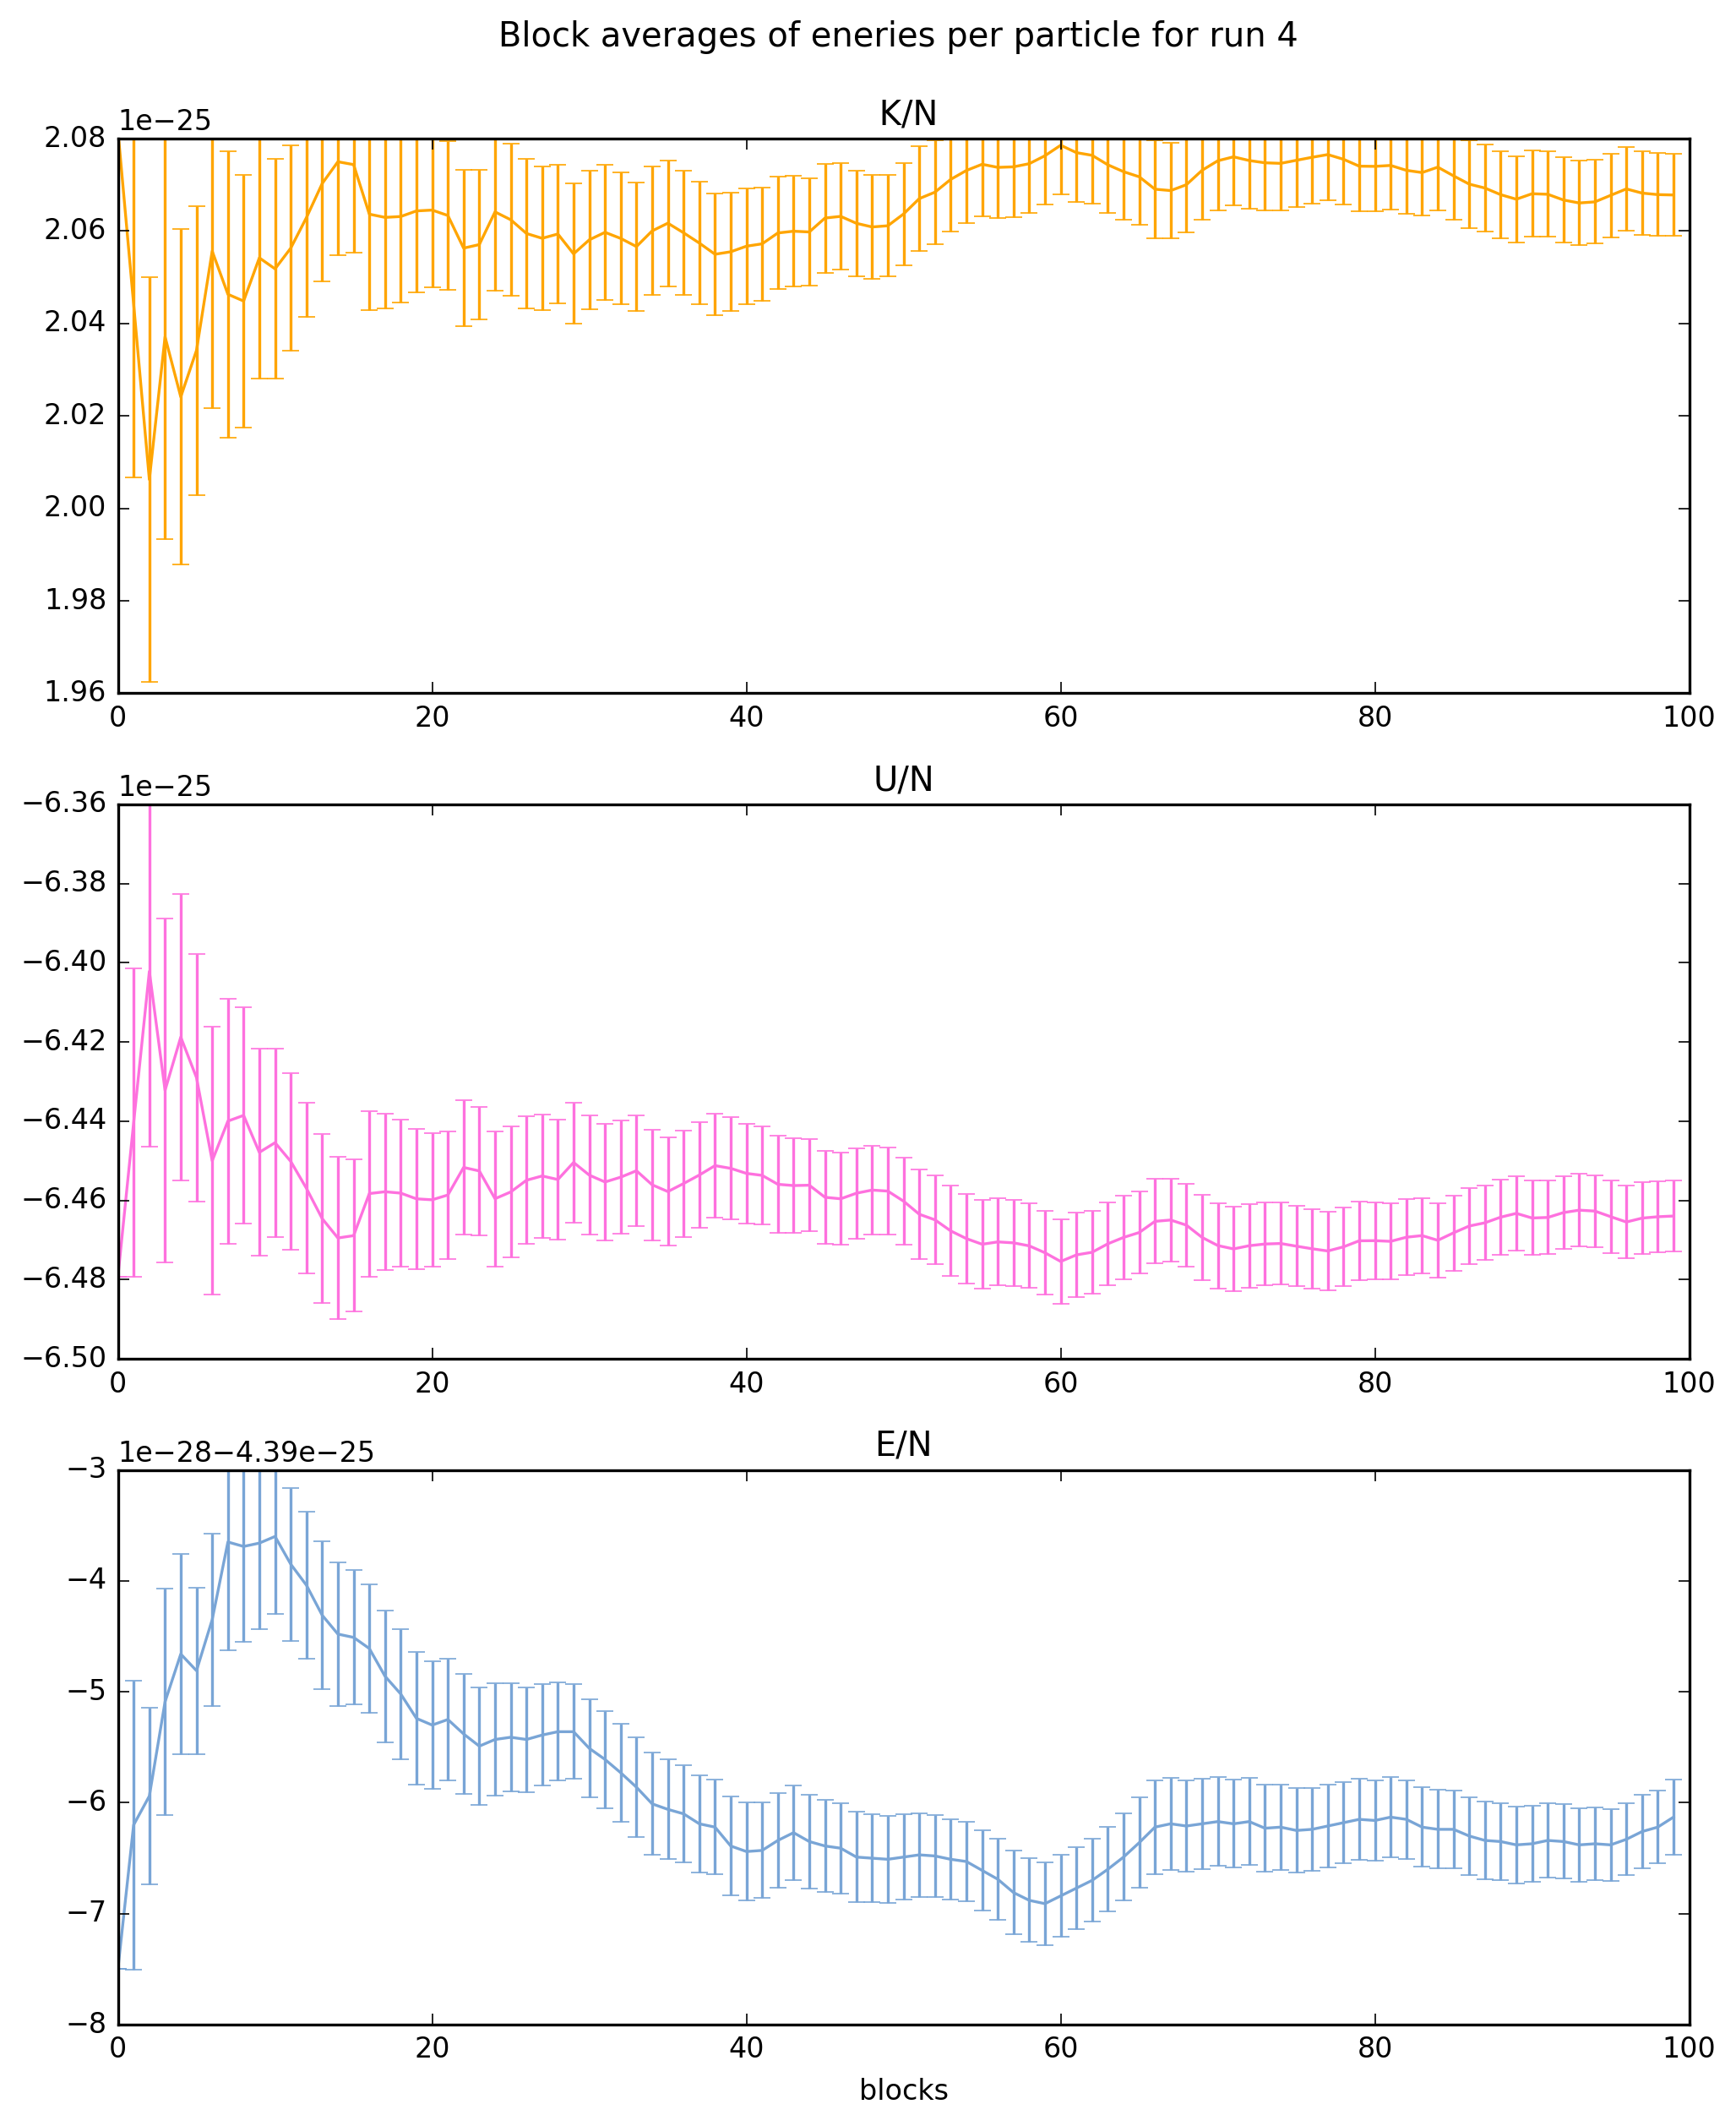

In [10]:
figure(num=None, figsize=(10, 12), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(311)
plt.errorbar(x, ave_kin_general[:,0], yerr=ave_kin_general[:,1], label='K/N', color='orange')
plt.title('Block averages of eneries per particle for run %i \n \n K/N' %runs)



plt.subplot(312)
plt.errorbar(x, ave_pot_general[:,0], yerr=ave_pot_general[:,1], label='U/N', color='#fe71de')
plt.title('U/N')


plt.subplot(313)
plt.errorbar(x, ave_tot_general[:,0], yerr=ave_tot_general[:,1], label='E/N', color='#79a5d6')
plt.xlabel('blocks')
plt.title('E/N')


plt.savefig('plots/block_energies.png')
plt.show()

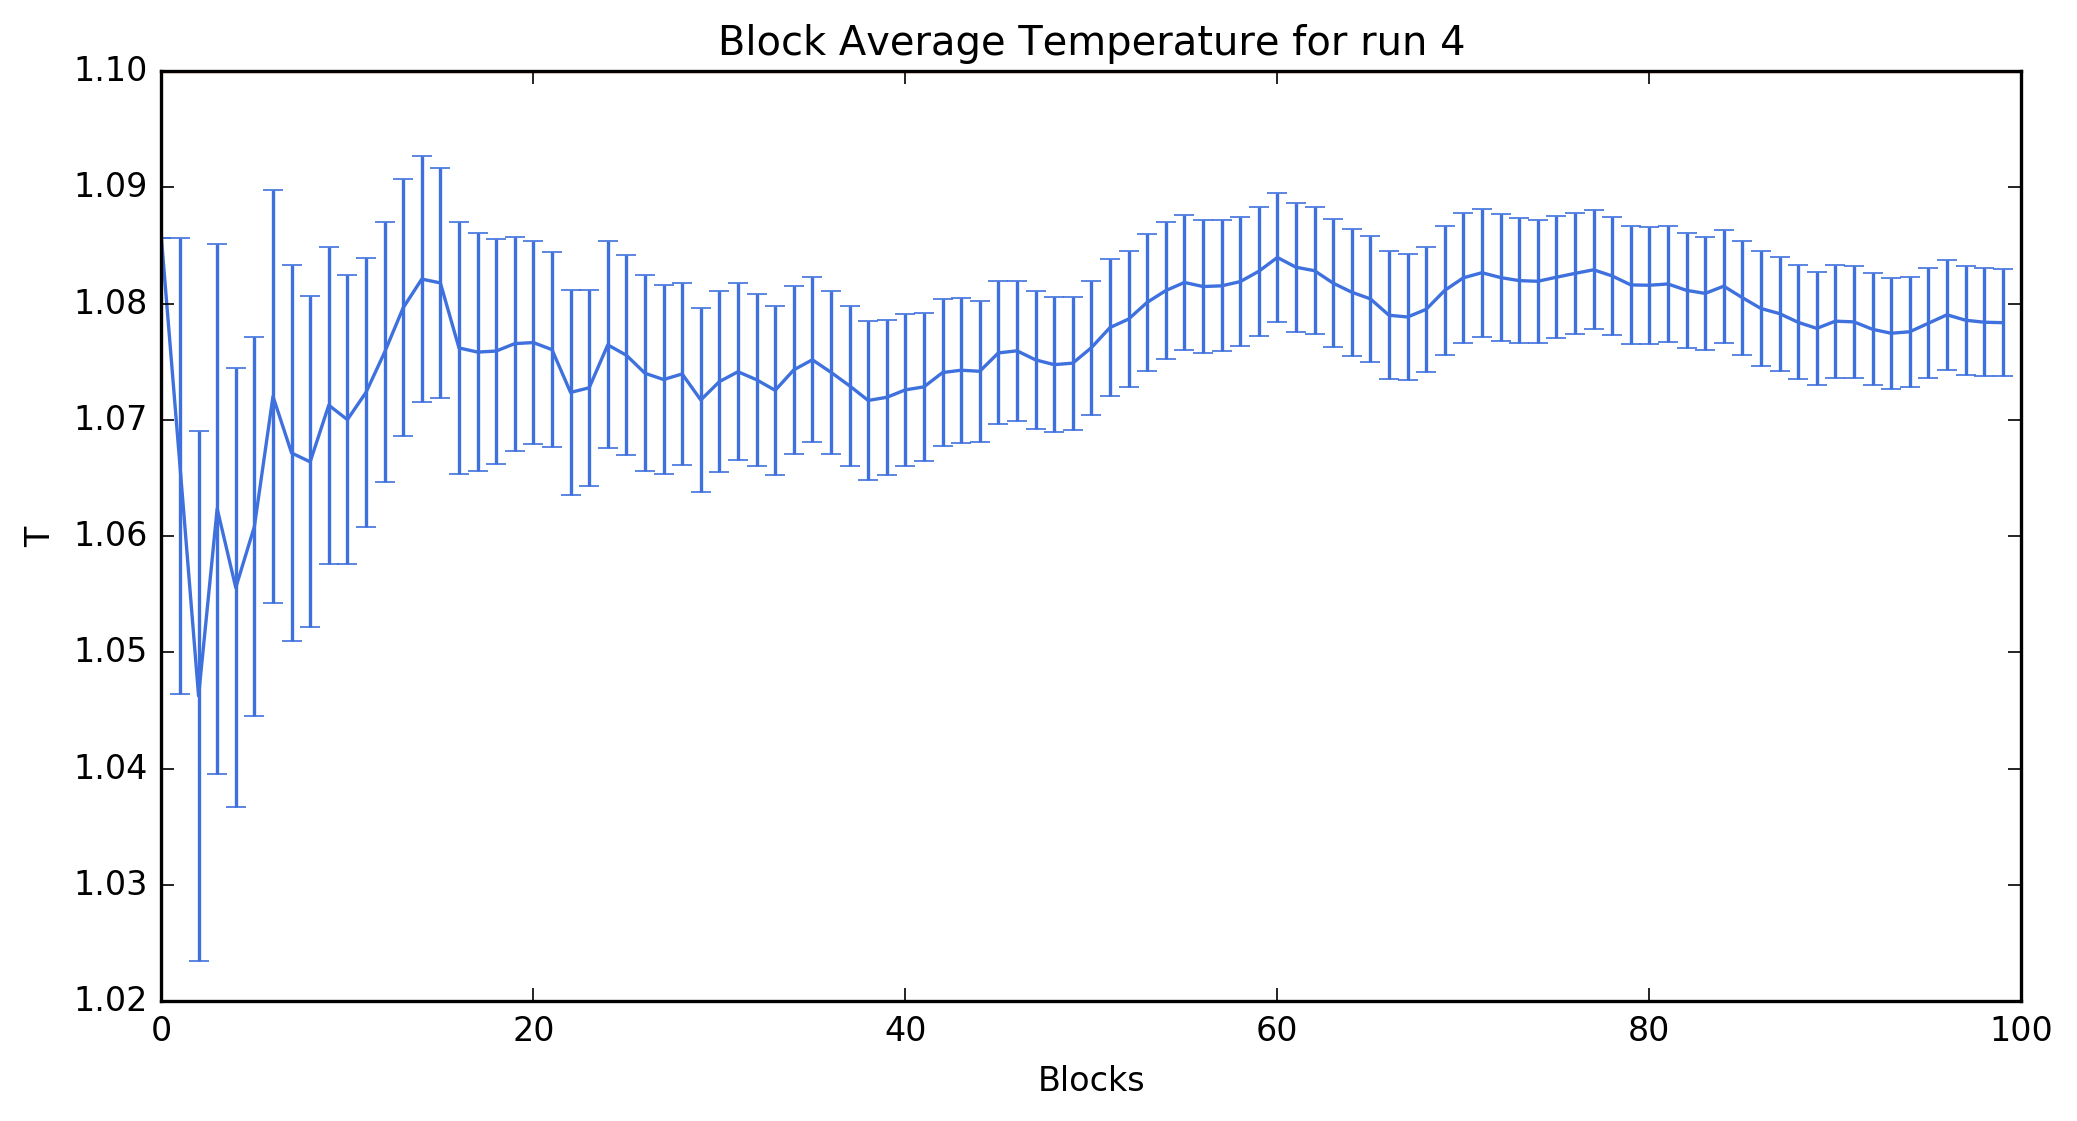

In [11]:
figure(num=None, figsize=(10, 5), dpi=240, facecolor='w', edgecolor='k')

plt.errorbar(x, ave_temp_general[:,0], yerr=ave_temp_general[:,1], label='Temperature', color='#3f71de')
plt.title('Block Average Temperature for run %i' %runs)
plt.axhline(1.1, color='#FF6347', label='Desires temperature')
plt.xlabel('Blocks')
plt.ylabel('T')
plt.savefig('plots/block_temp.png')
plt.show()

--------

# Es 4.3


<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code</span>: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

In [12]:
pres = np.loadtxt(element + '/' + state +'/output_Pres.dat')
x_pres = np.arange(len(pres))

In [13]:
ave_pres = np.loadtxt(element + '/' + state +'/ave_pres.out', skiprows=1)
x_ave_pres = np.arange(len(ave_pres))

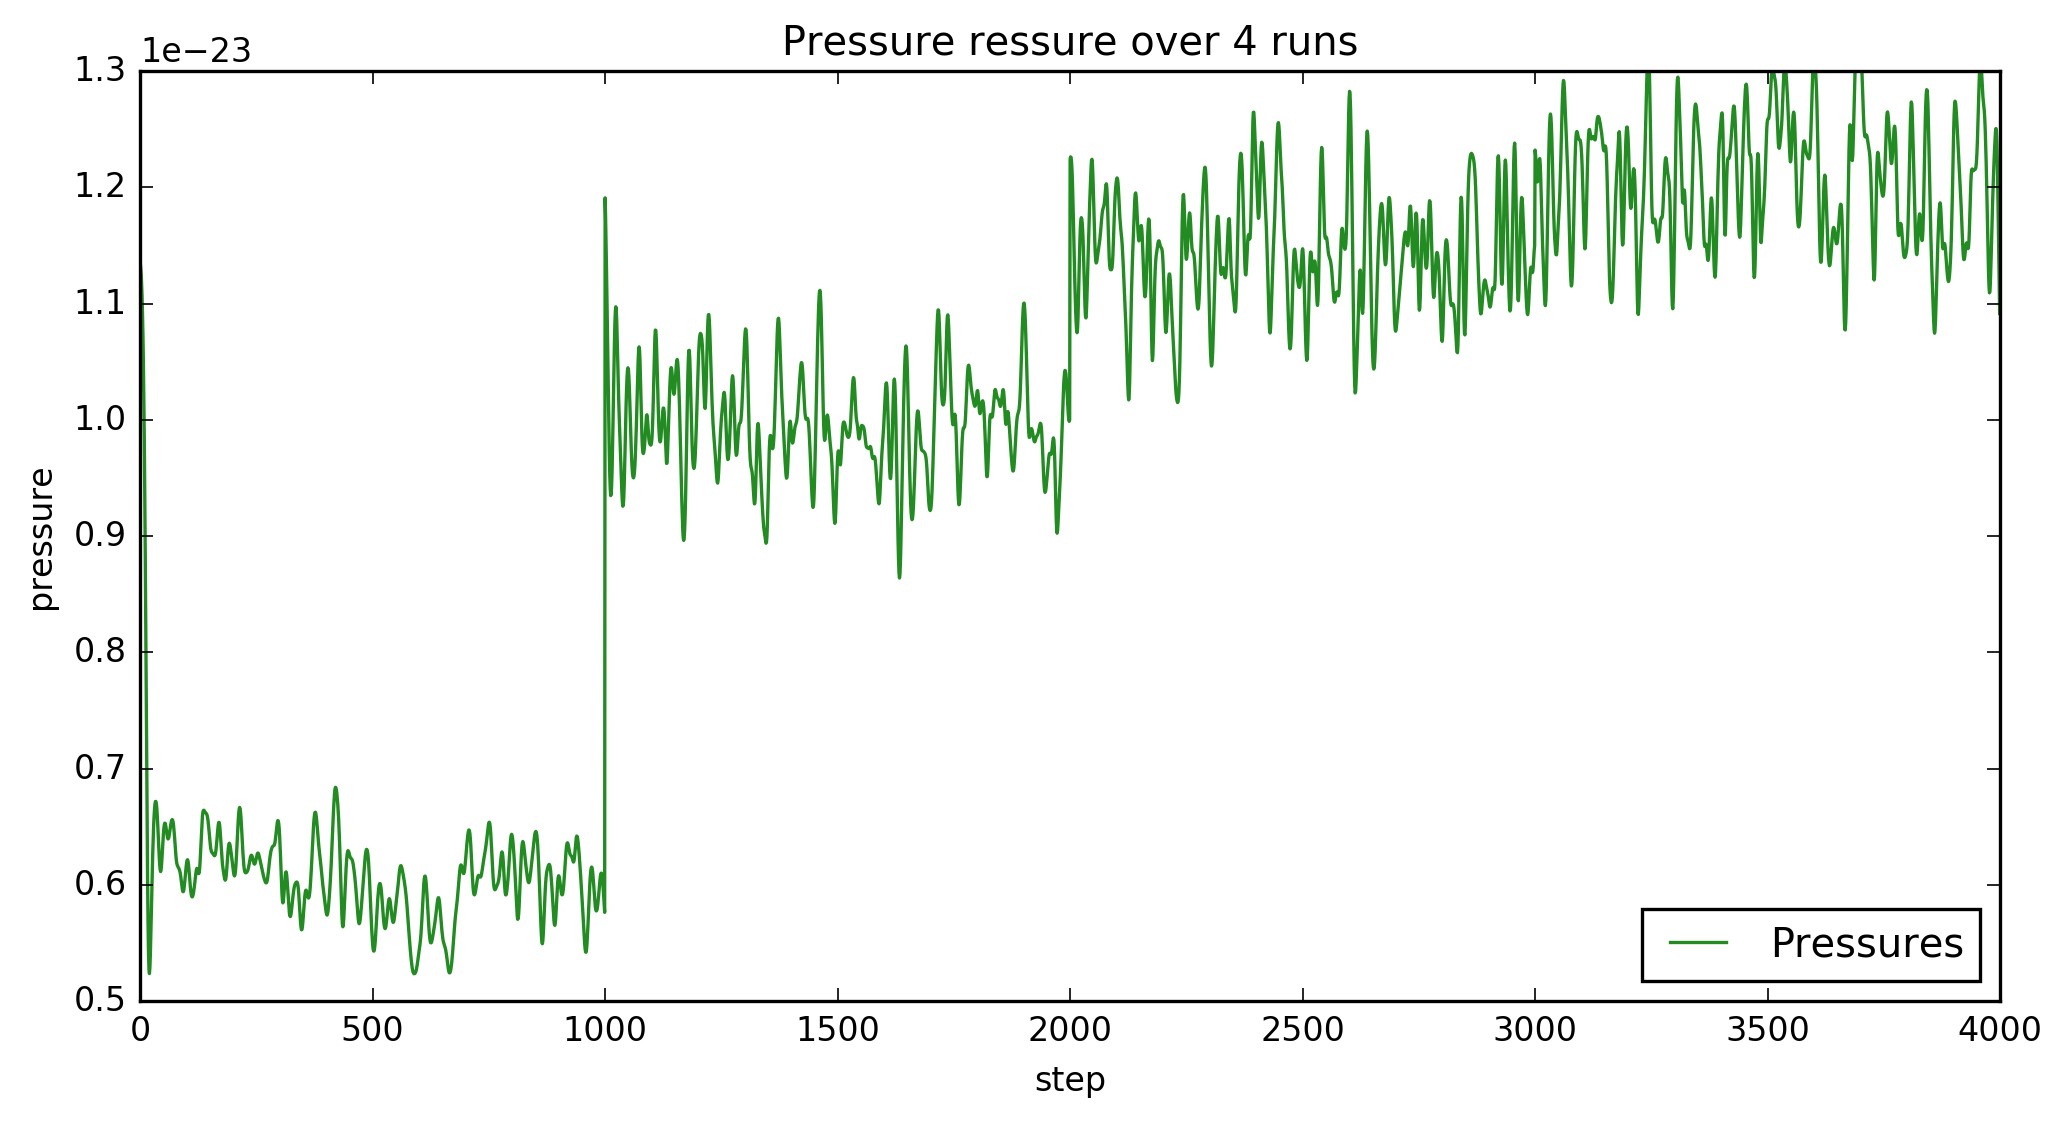

In [14]:
figure(num=None, figsize=(10, 5), dpi=240, facecolor='w', edgecolor='k')

plt.plot(x_pres, pres, label='Pressures', color='#228B22')
plt.title('Pressure ressure over %i runs' %runs)
plt.legend(loc='lower right')
plt.xlabel('step')
plt.ylabel('pressure')
plt.savefig('plots/pressure.png')
plt.show()

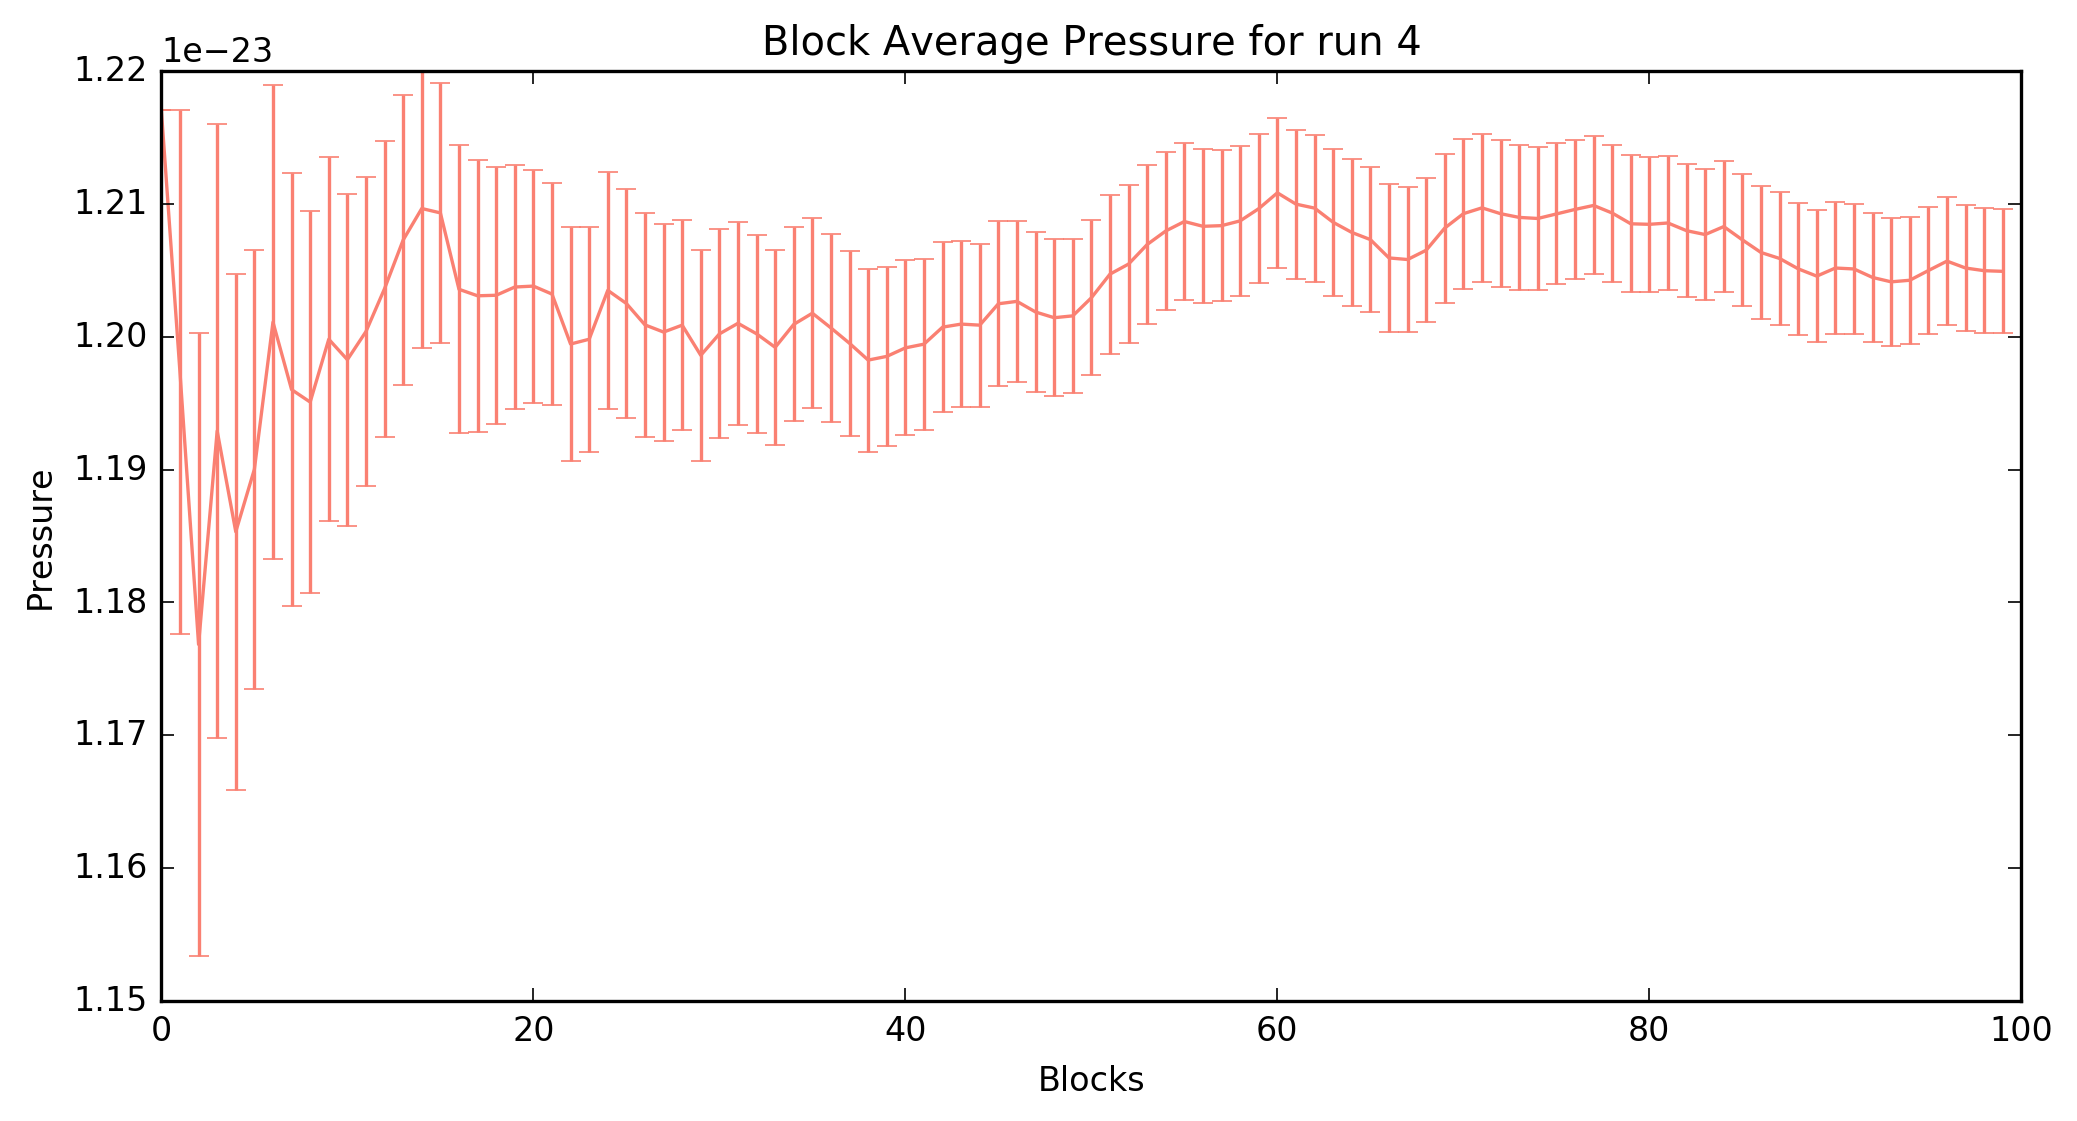

In [15]:
figure(num=None, figsize=(10, 5), dpi=240, facecolor='w', edgecolor='k')

plt.errorbar(x_ave_pres, ave_pres[:,0], yerr=ave_pres[:,1], label='Pressure', color='#FA8072')
plt.title('Block Average Pressure for run %i' %runs)
plt.xlabel('Blocks')
plt.ylabel('Pressure')
plt.savefig('plots/block_pres.png')
plt.show()

------

# Es 4.4

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the pressure $P$ and the temperature, $T$

## Solid

In [55]:
element = ['Kripton', 'Argon']
#element = 'Kripton'
state = 'solid'

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [57]:
runs = np.loadtxt('run.dat')
runs = int(runs)
print('Number of runs:', runs)

Number of runs: 3


In [58]:
temp_0 = np.loadtxt(element[0] + '/' + state +'/ave_temp.out', skiprows=1)
temp_1 = np.loadtxt(element[1] + '/' + state +'/ave_temp.out', skiprows=1)

x = np.arange(len(temp_0))

kin_en_0 = np.loadtxt(element[0] + '/' + state +'/ave_ekin.out', skiprows=1)
kin_en_1 = np.loadtxt(element[1] + '/' + state +'/ave_ekin.out', skiprows=1)



pot_en_0 = np.loadtxt(element[0] + '/' + state +'/ave_epot.out', skiprows=1)
pot_en_1 = np.loadtxt(element[1] + '/' + state +'/ave_epot.out', skiprows=1)



tot_en_0 = np.loadtxt(element[0] + '/' + state +'/ave_etot.out', skiprows=1)
tot_en_1 = np.loadtxt(element[1] + '/' + state +'/ave_etot.out', skiprows=1)

pres_0 = np.loadtxt(element[0] + '/' + state +'/ave_pres.out', skiprows=1)
pres_1 = np.loadtxt(element[1] + '/' + state +'/ave_pres.out', skiprows=1)

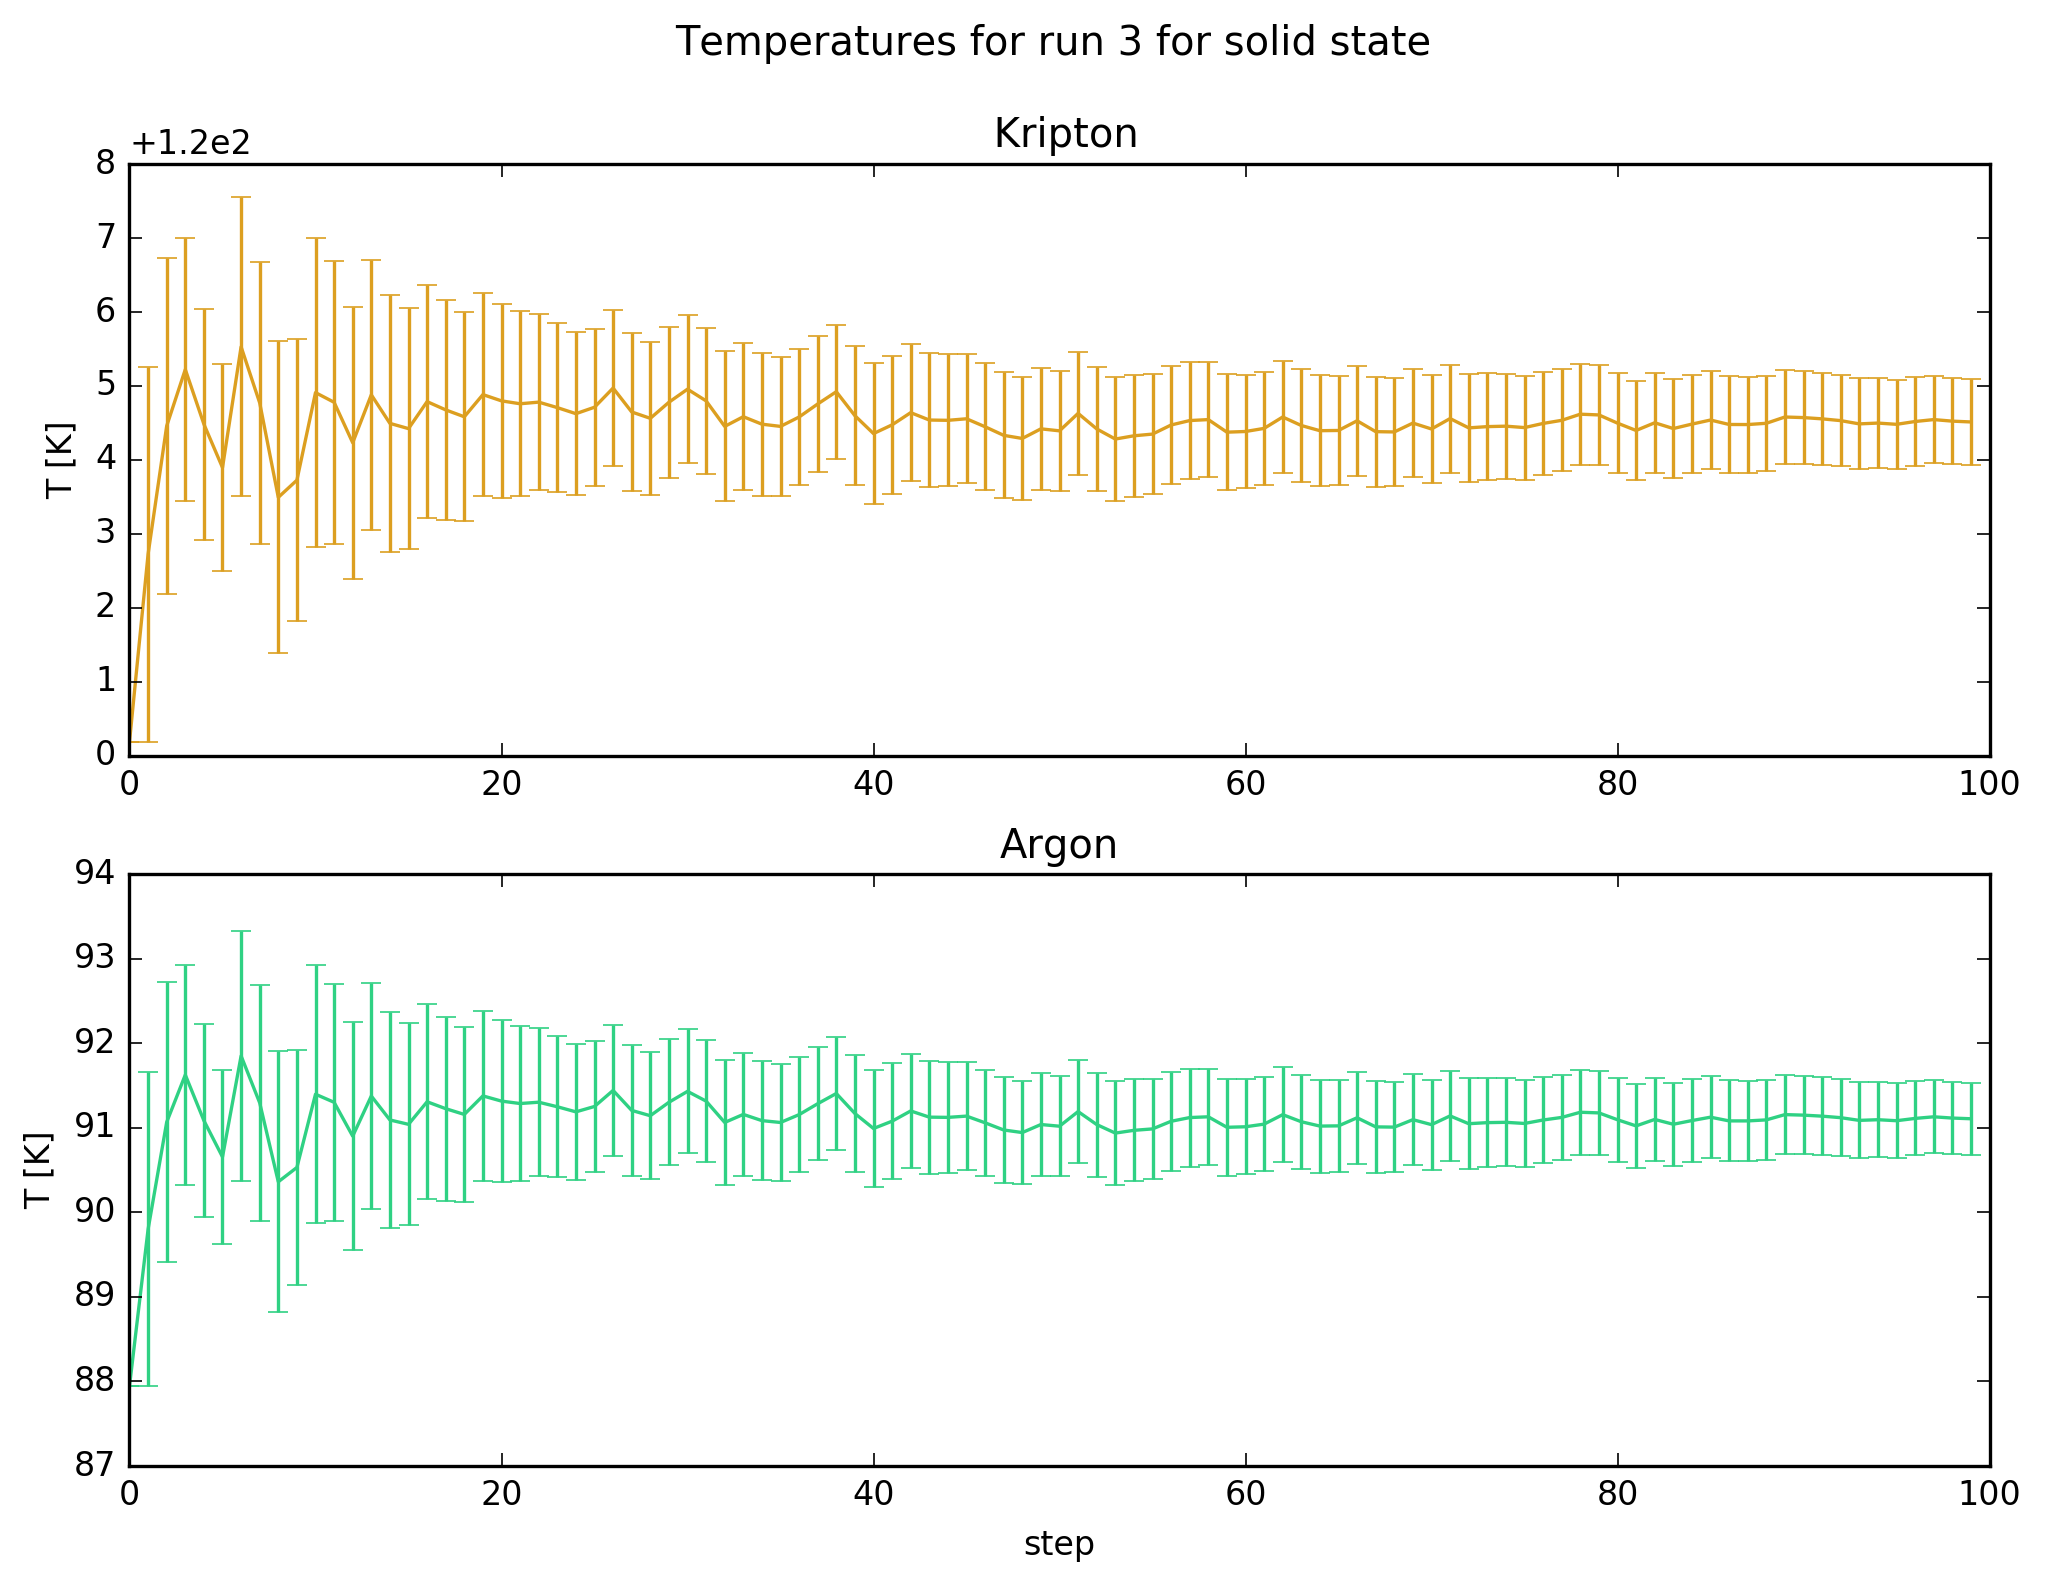

In [59]:
figure(num=None, figsize=(10, 7), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.errorbar(x, temp_0[:,0], yerr=temp_0[:,1], label='Kripton', color='#dc9f20')
plt.title(('Temperatures for run %i for ' + state +' state \n \n Kripton') %runs)
plt.ylabel('T [K]')

plt.subplot(212)
plt.errorbar(x, temp_1[:,0], yerr=temp_1[:,1], label='Argon', color='#2fd183')
plt.title('Argon')
#plt.axhline(1.1, label='Desired temperature', color='#2fd183')
plt.xlabel('step')
plt.ylabel('T [K]')

#plt.ticklabel_format(useOffset=False, style='plain')

plt.savefig('plots/temperatures_'+state+'.png')
plt.show()

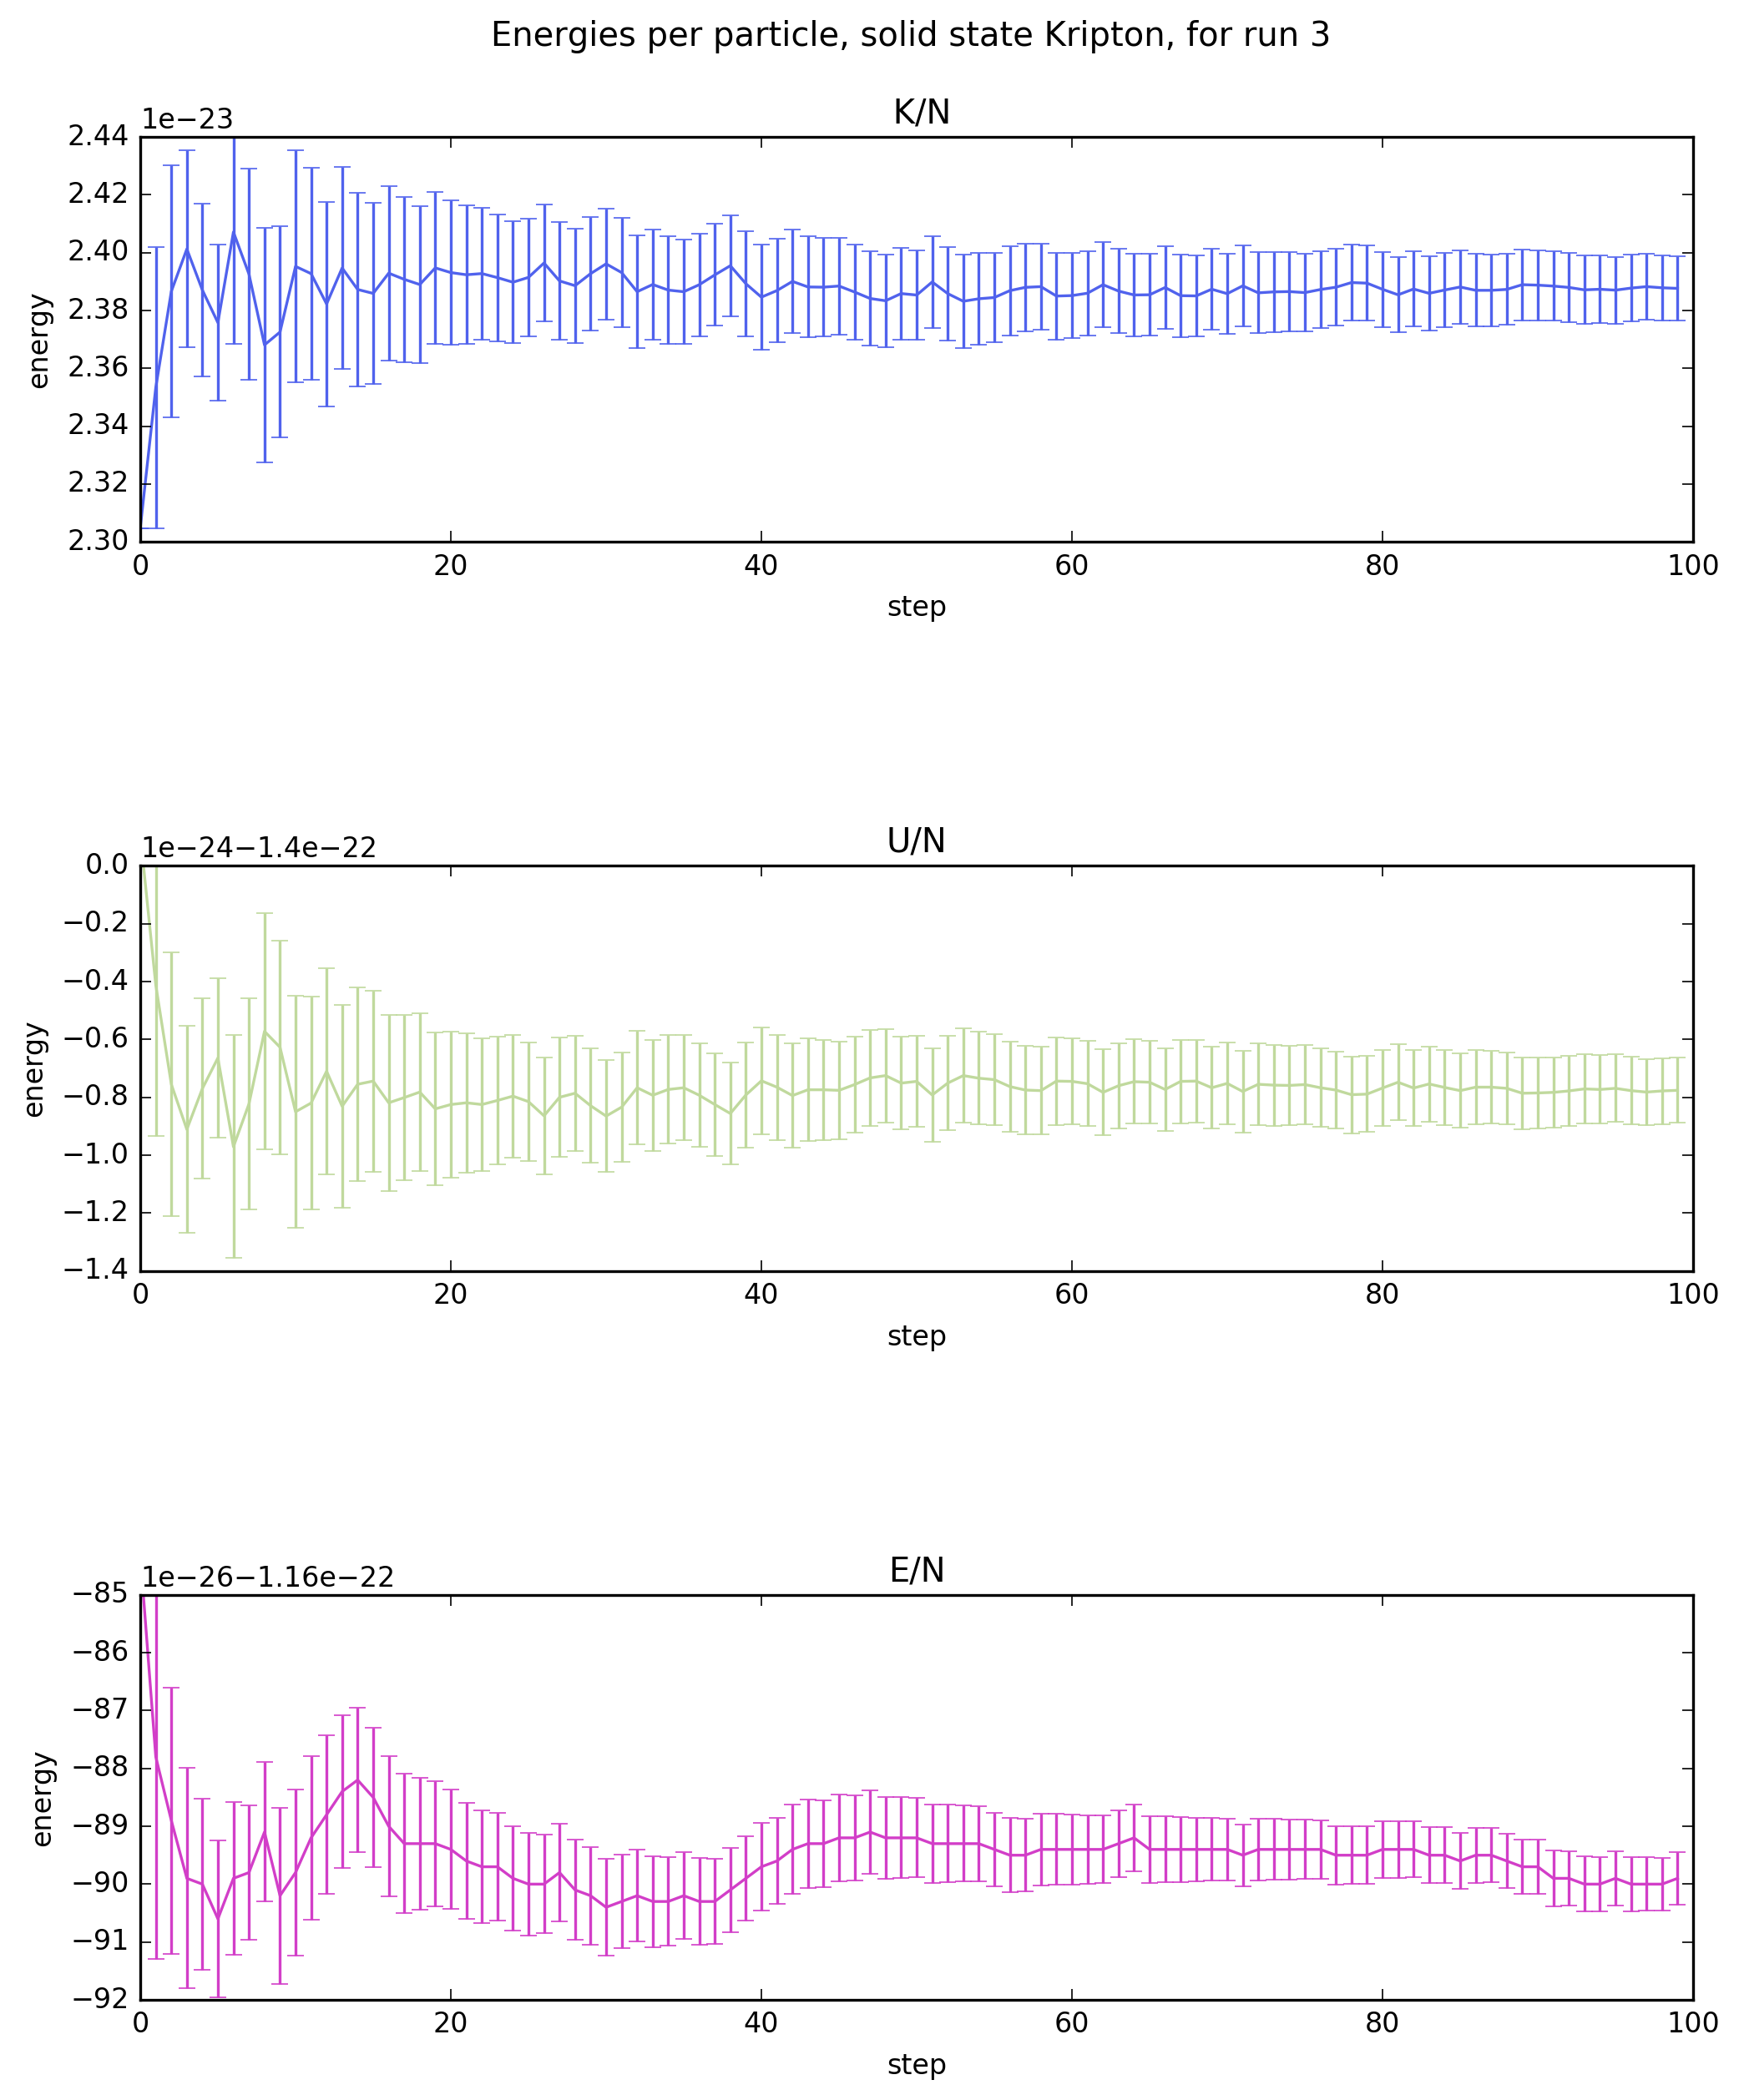

In [60]:
figure(num=None, figsize=(10, 12), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(311)
plt.errorbar(x, kin_en_0[:,0], yerr=kin_en_0[:,1], label='Kinetic Energy Kripton', color='#5062ed')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('Energies per particle, ' + state + ' state Kripton, for run %i \n \n K/N' %runs)

plt.subplot(312)
plt.errorbar(x, pot_en_0[:,0], yerr=pot_en_0[:,1], label='Potential Energy Kripton', color='#c0d99d')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('U/N')

plt.subplot(313)
plt.errorbar(x, tot_en_0[:,0], yerr=tot_en_0[:,1], label='Total Energy Kripton', color='#d23ec8')
plt.title('E/N')
plt.subplots_adjust(hspace=0.8)

plt.xlabel('step')
plt.ylabel('energy')
plt.savefig('plots/energies_kripton_'+state+'.png')
plt.show()

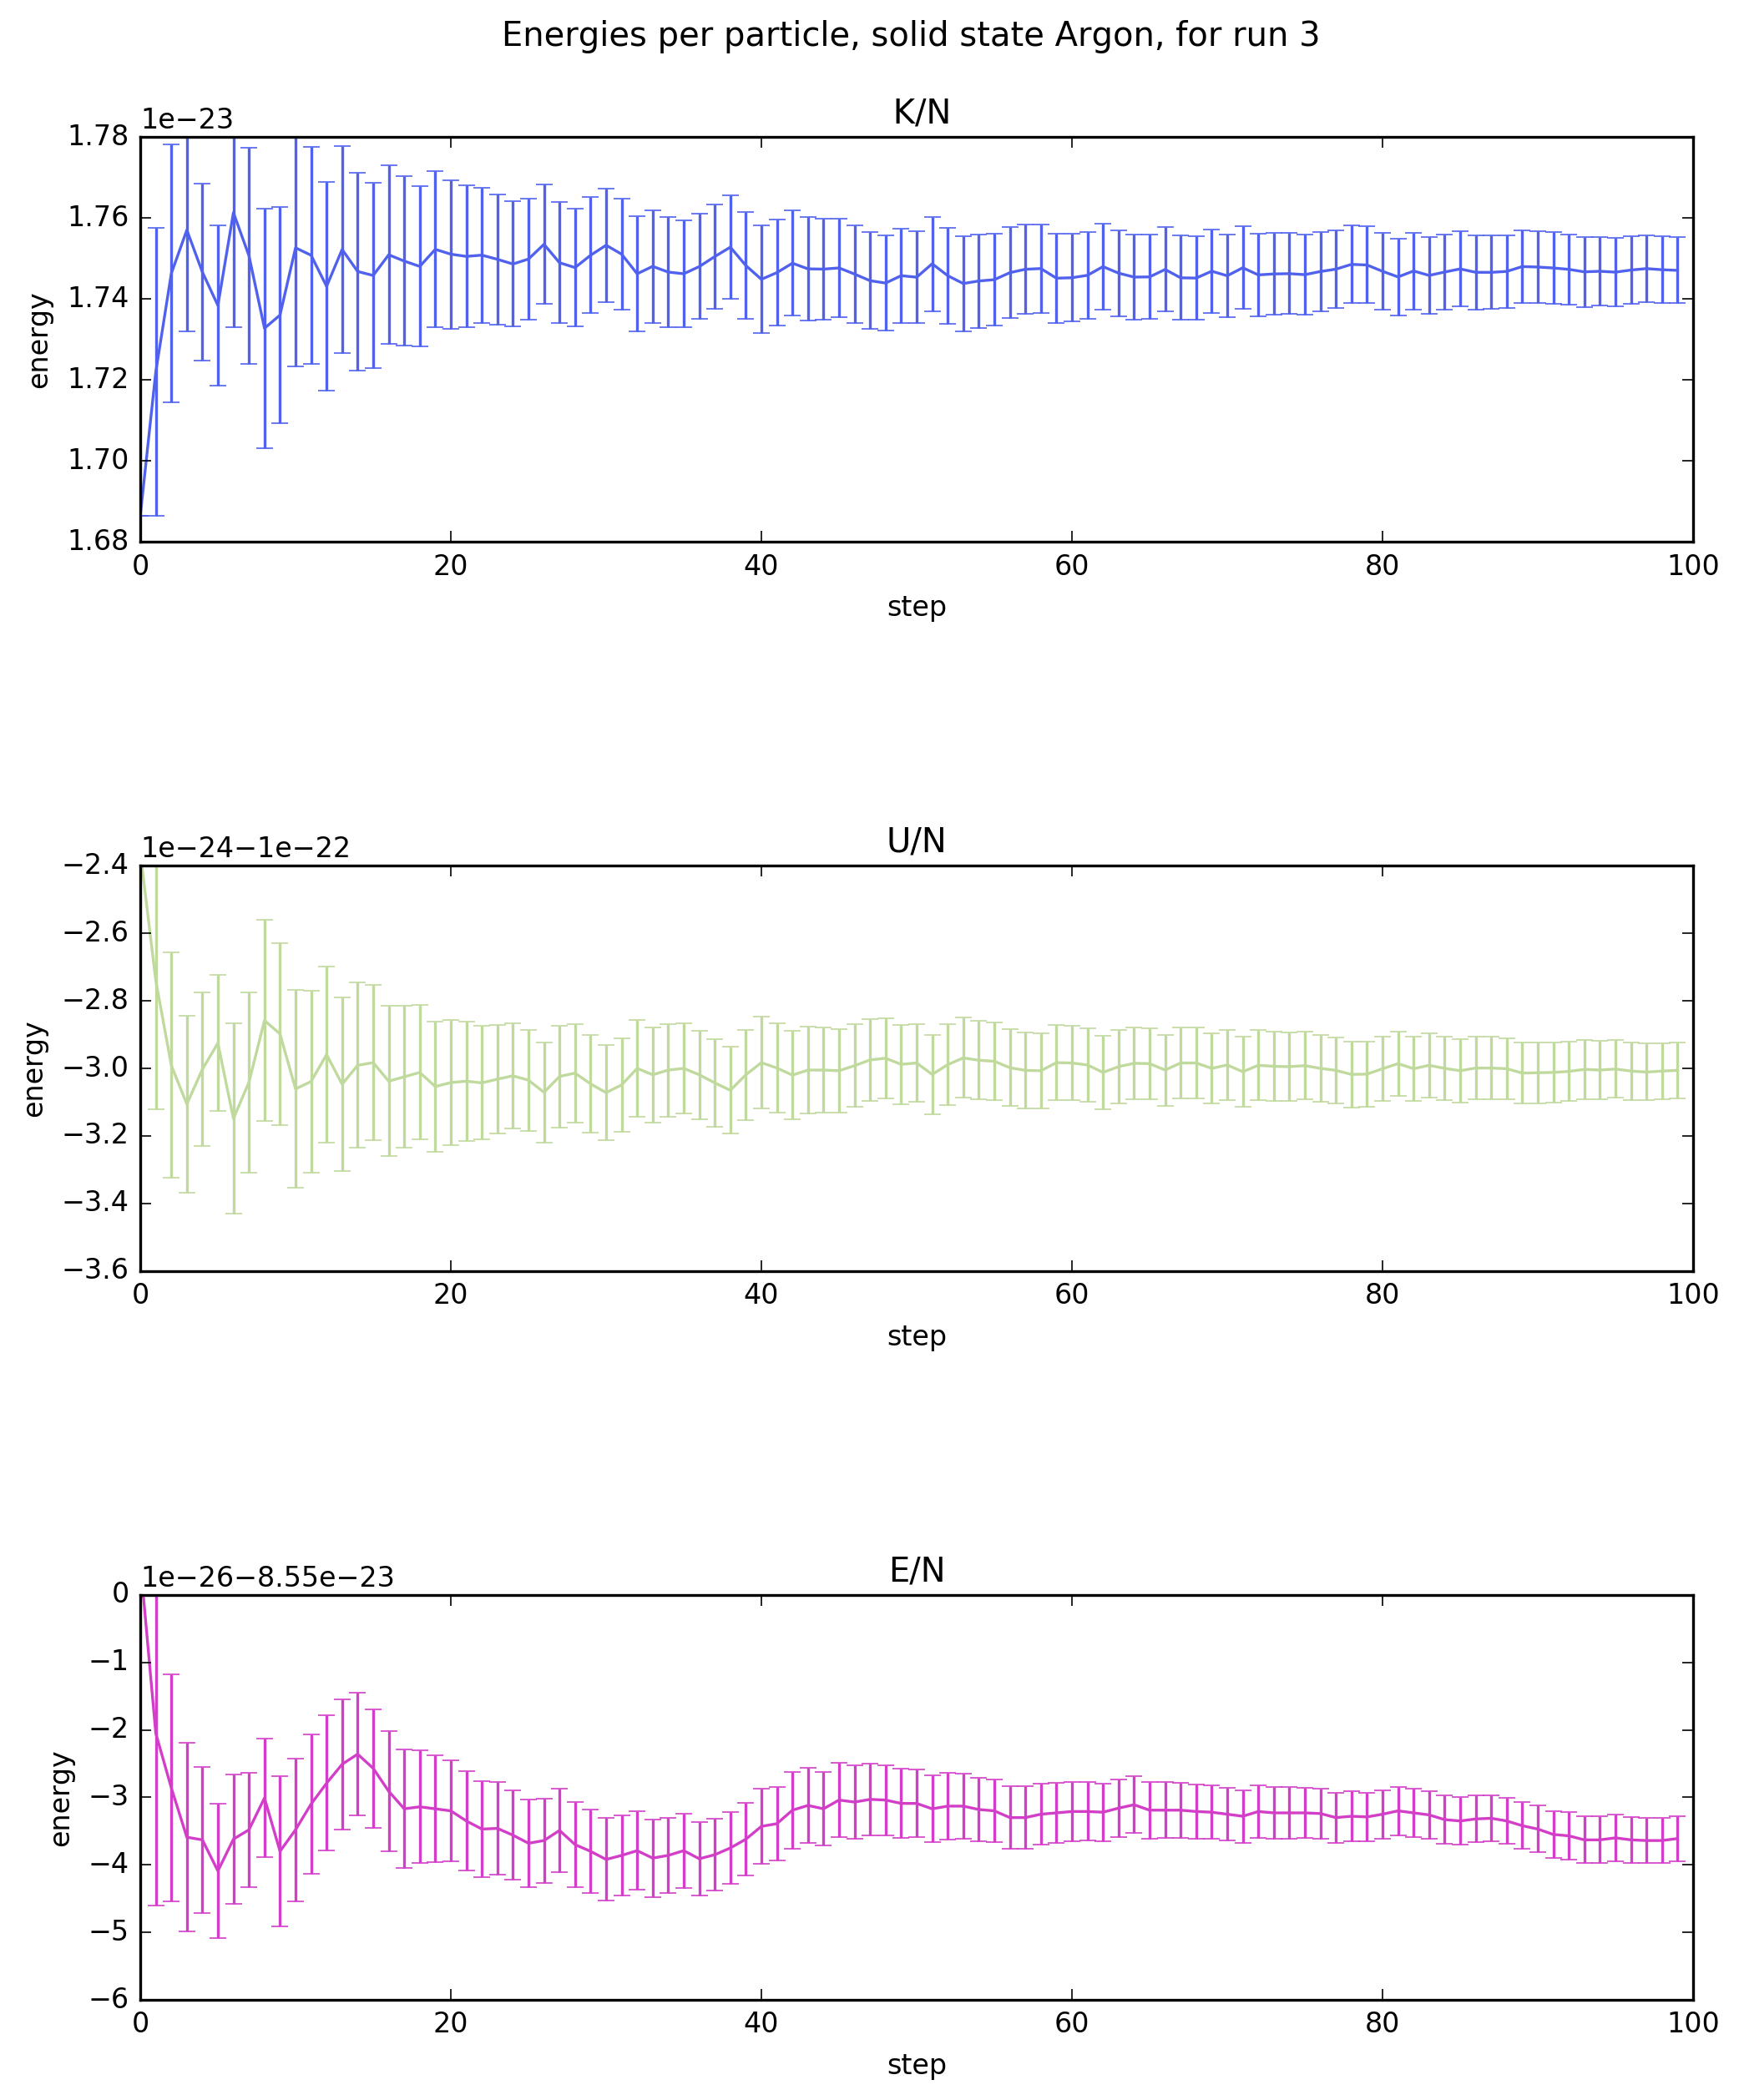

In [61]:
figure(num=None, figsize=(10, 12), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(311)
plt.errorbar(x, kin_en_1[:,0], yerr=kin_en_1[:,1], label='Kinetic Energy Kripton', color='#5062ed')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('Energies per particle, ' + state + ' state Argon, for run %i \n \n K/N' %runs)

plt.subplot(312)
plt.errorbar(x, pot_en_1[:,0], yerr=pot_en_1[:,1], label='Potential Energy Kripton', color='#c0d99d')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('U/N')

plt.subplot(313)
plt.errorbar(x, tot_en_1[:,0], yerr=tot_en_1[:,1], label='Total Energy Kripton', color='#d23ec8')
plt.title('E/N')
plt.subplots_adjust(hspace=0.8)

plt.xlabel('step')
plt.ylabel('energy')
plt.savefig('plots/energies_argon_'+state+'.png')
plt.show()

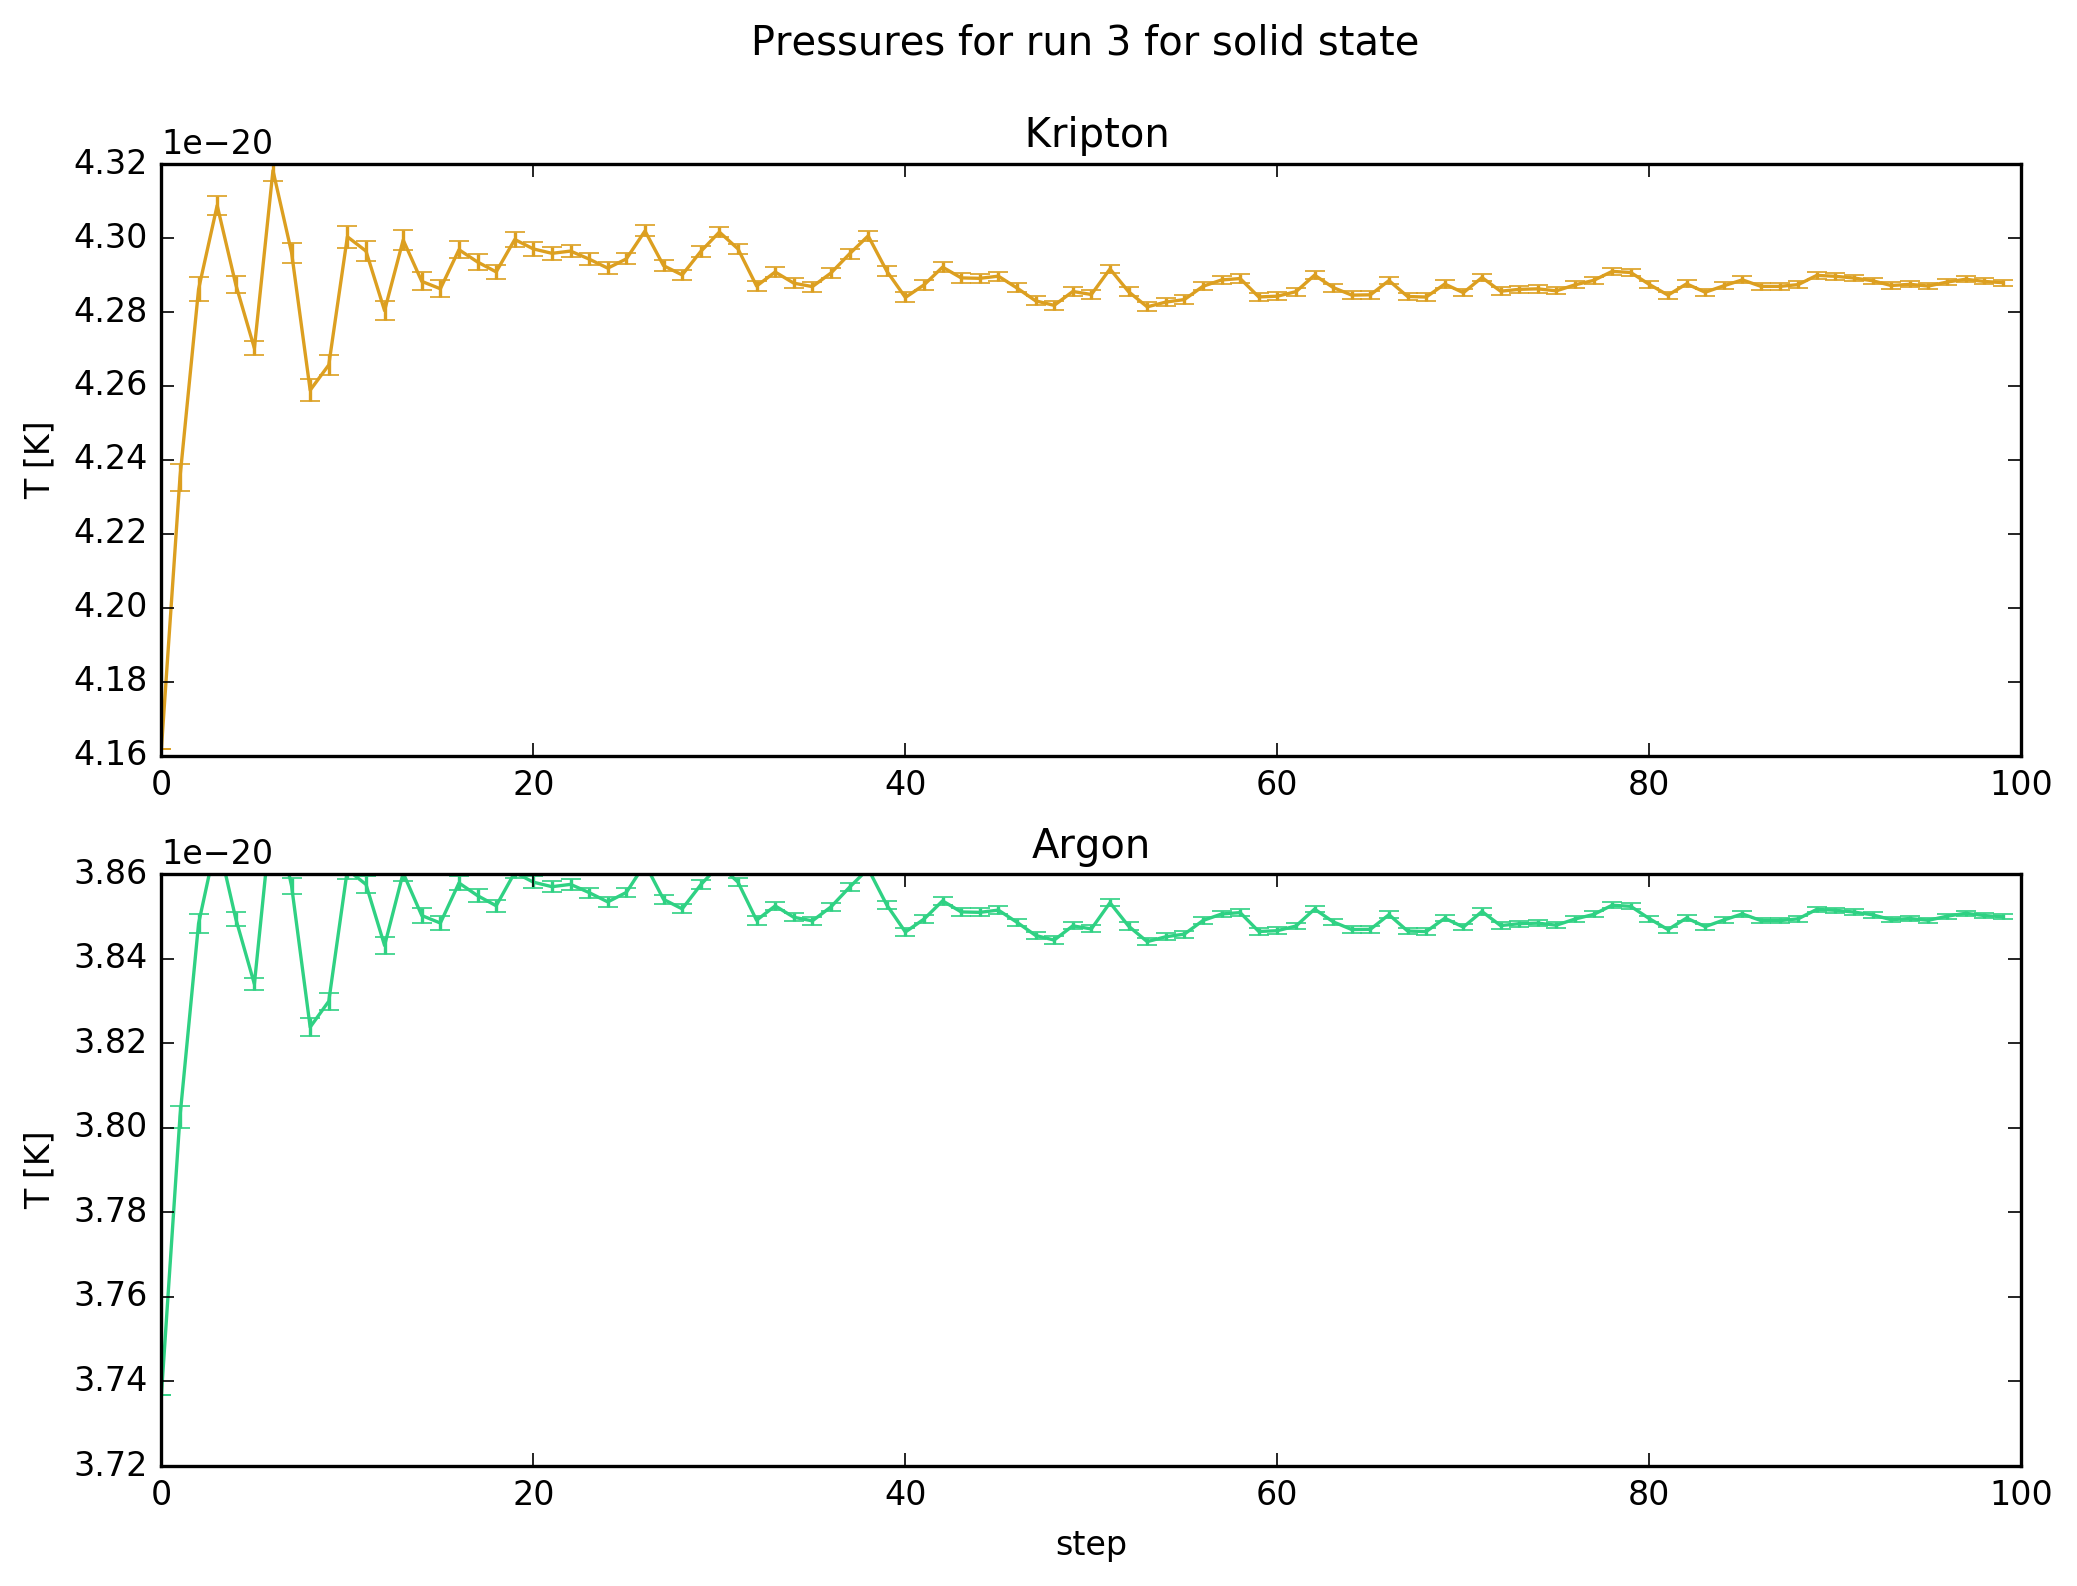

In [62]:
figure(num=None, figsize=(10, 7), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.errorbar(x, pres_0[:,0], yerr=pres_0[:,1], label='Kripton', color='#dc9f20')
plt.title(('Pressures for run %i for ' + state +' state \n \n Kripton') %runs)
plt.ylabel('P')

plt.subplot(212)
plt.errorbar(x, pres_1[:,0], yerr=pres_1[:,1], label='Argon', color='#2fd183')
plt.title('Argon')
#plt.axhline(1.1, label='Desired temperature', color='#2fd183')
plt.xlabel('step')
plt.ylabel('P')

#plt.ticklabel_format(useOffset=False, style='plain')

plt.savefig('plots/pressures_'+state+'.png')
plt.show()

------------- 
## Liquid

In [63]:
element = ['Kripton', 'Argon']
#element = 'Kripton'
state = 'liquid'

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [65]:
runs = np.loadtxt('run.dat')
runs = int(runs)
print('Number of runs:', runs)

Number of runs: 3


In [66]:
temp_0 = np.loadtxt(element[0] + '/' + state +'/ave_temp.out', skiprows=1)
temp_1 = np.loadtxt(element[1] + '/' + state +'/ave_temp.out', skiprows=1)

x = np.arange(len(temp_0))

kin_en_0 = np.loadtxt(element[0] + '/' + state +'/ave_ekin.out', skiprows=1)
kin_en_1 = np.loadtxt(element[1] + '/' + state +'/ave_ekin.out', skiprows=1)



pot_en_0 = np.loadtxt(element[0] + '/' + state +'/ave_epot.out', skiprows=1)
pot_en_1 = np.loadtxt(element[1] + '/' + state +'/ave_epot.out', skiprows=1)



tot_en_0 = np.loadtxt(element[0] + '/' + state +'/ave_etot.out', skiprows=1)
tot_en_1 = np.loadtxt(element[1] + '/' + state +'/ave_etot.out', skiprows=1)

pres_0 = np.loadtxt(element[0] + '/' + state +'/ave_pres.out', skiprows=1)
pres_1 = np.loadtxt(element[1] + '/' + state +'/ave_pres.out', skiprows=1)

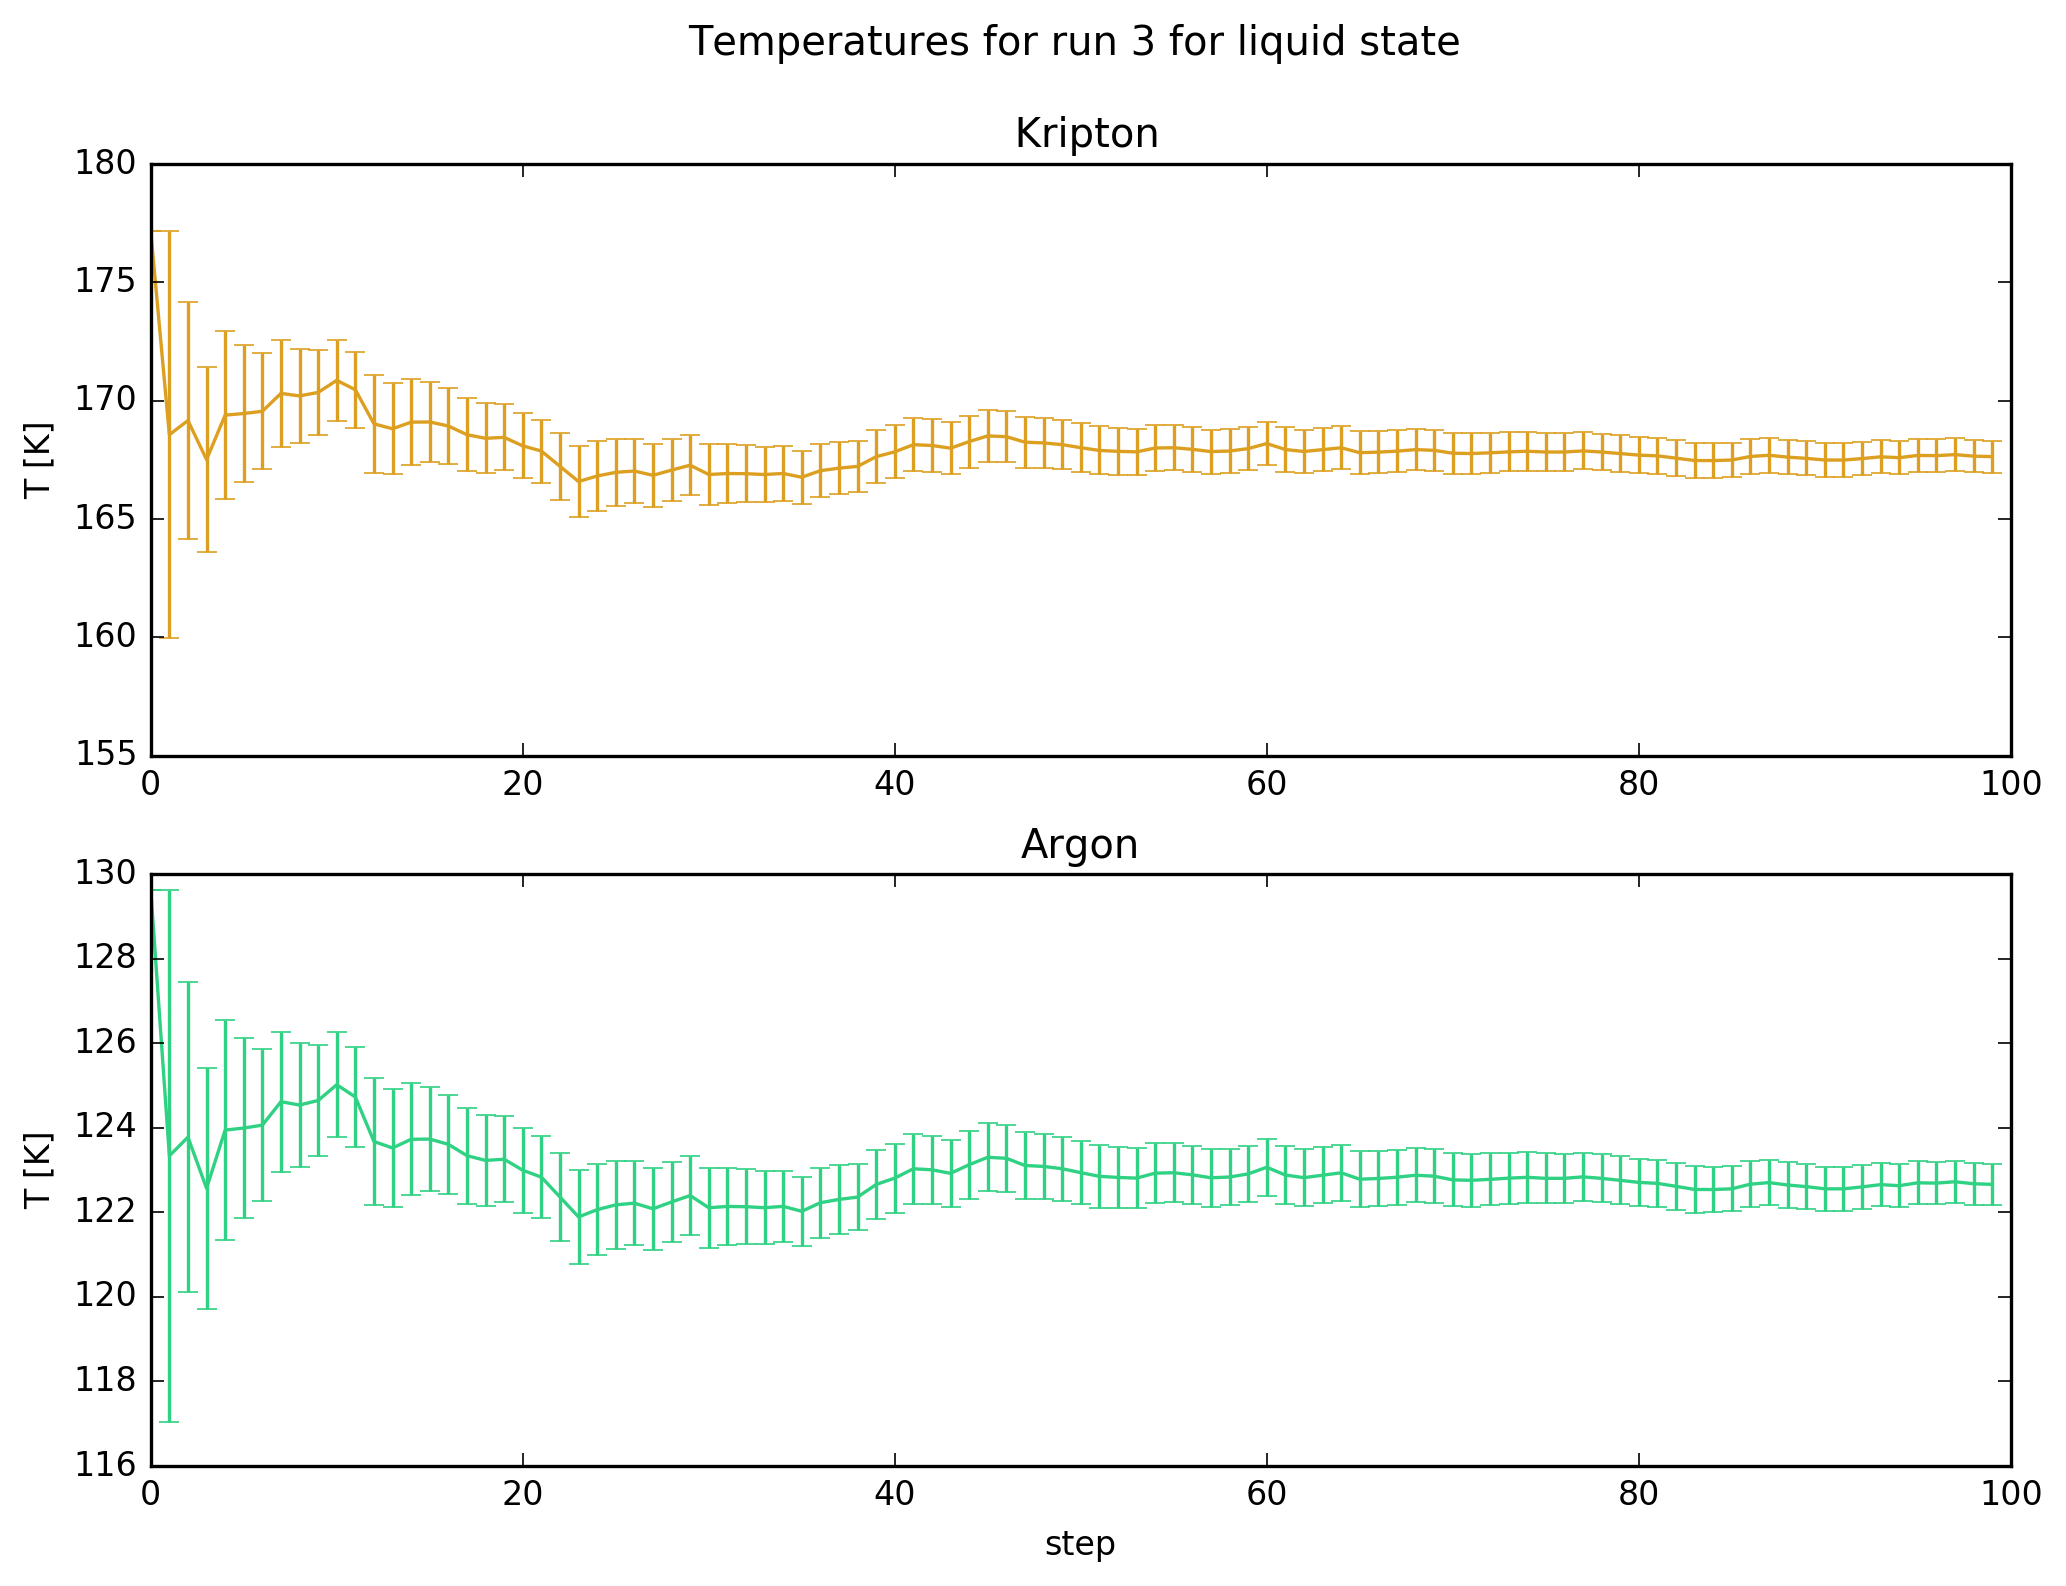

In [67]:
figure(num=None, figsize=(10, 7), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.errorbar(x, temp_0[:,0], yerr=temp_0[:,1], label='Kripton', color='#dc9f20')
plt.title(('Temperatures for run %i for ' + state +' state \n \n Kripton') %runs)
plt.ylabel('T [K]')

plt.subplot(212)
plt.errorbar(x, temp_1[:,0], yerr=temp_1[:,1], label='Argon', color='#2fd183')
plt.title('Argon')
#plt.axhline(1.1, label='Desired temperature', color='#2fd183')
plt.xlabel('step')
plt.ylabel('T [K]')

#plt.ticklabel_format(useOffset=False, style='plain')

plt.savefig('plots/temperatures_'+state+'.png')
plt.show()

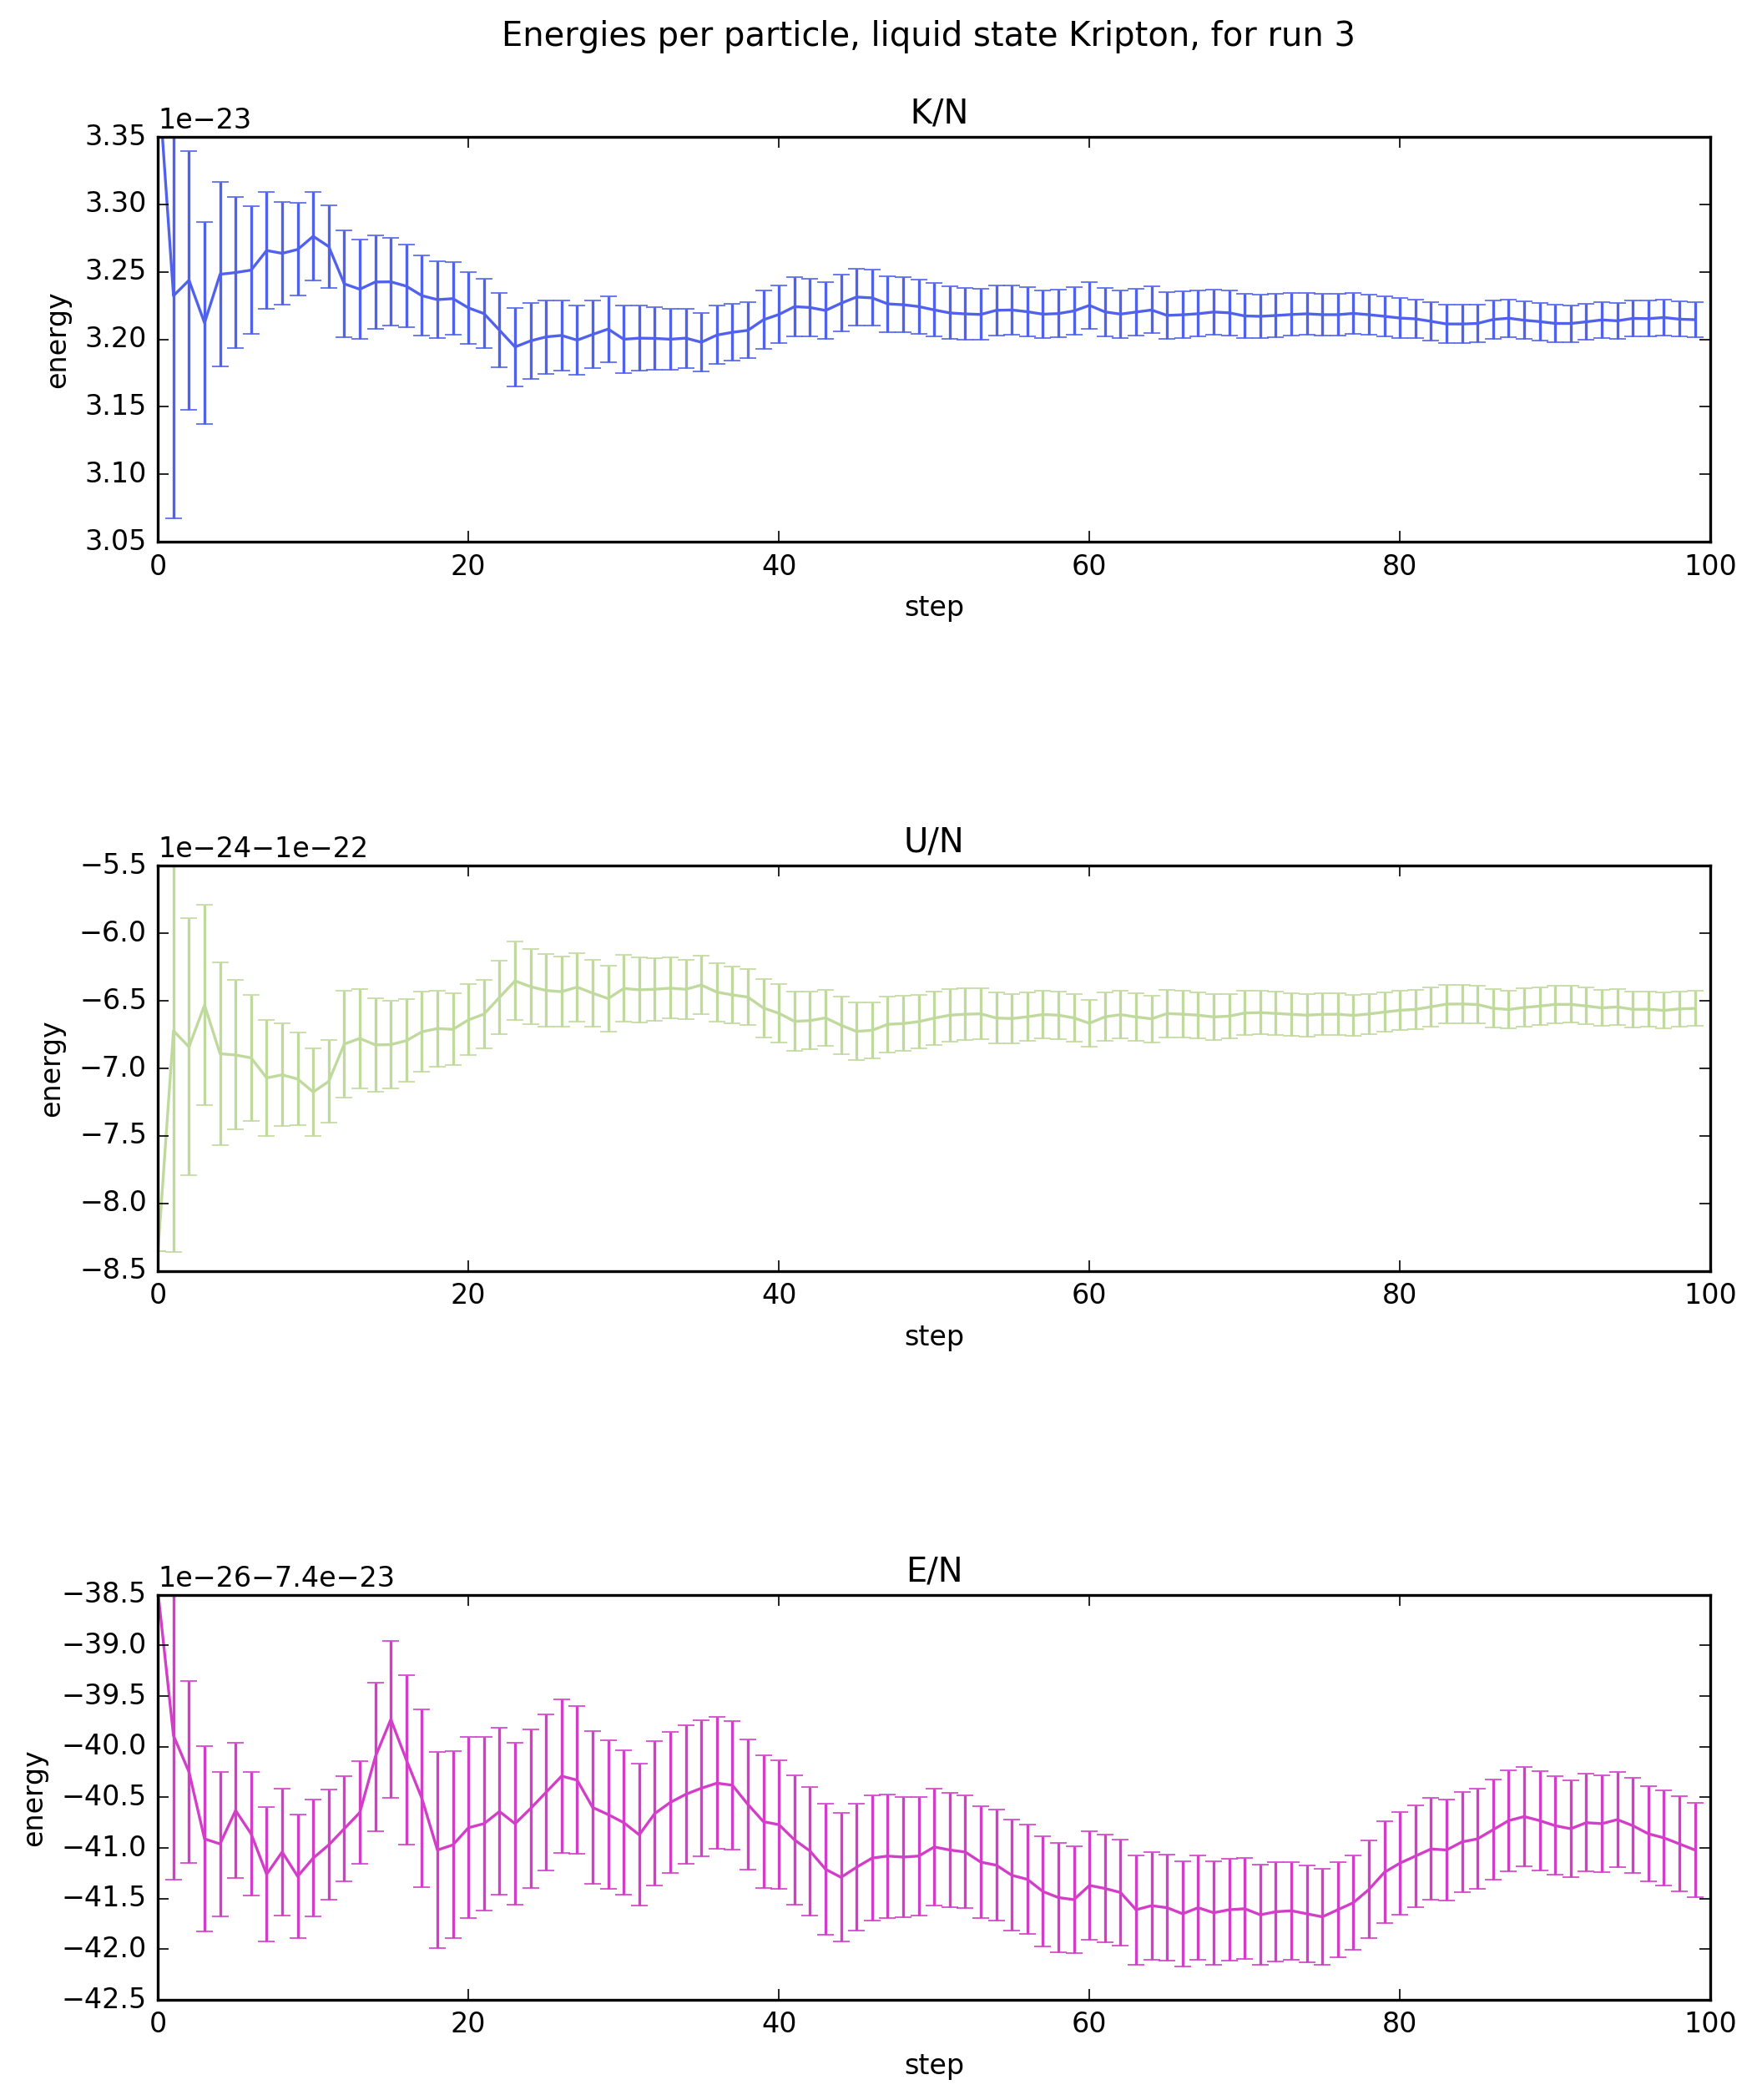

In [68]:
figure(num=None, figsize=(10, 12), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(311)
plt.errorbar(x, kin_en_0[:,0], yerr=kin_en_0[:,1], label='Kinetic Energy Kripton', color='#5062ed')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('Energies per particle, ' + state + ' state Kripton, for run %i \n \n K/N' %runs)

plt.subplot(312)
plt.errorbar(x, pot_en_0[:,0], yerr=pot_en_0[:,1], label='Potential Energy Kripton', color='#c0d99d')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('U/N')

plt.subplot(313)
plt.errorbar(x, tot_en_0[:,0], yerr=tot_en_0[:,1], label='Total Energy Kripton', color='#d23ec8')
plt.title('E/N')
plt.subplots_adjust(hspace=0.8)

plt.xlabel('step')
plt.ylabel('energy')
plt.savefig('plots/energies_kripton_'+state+'.png')
plt.show()

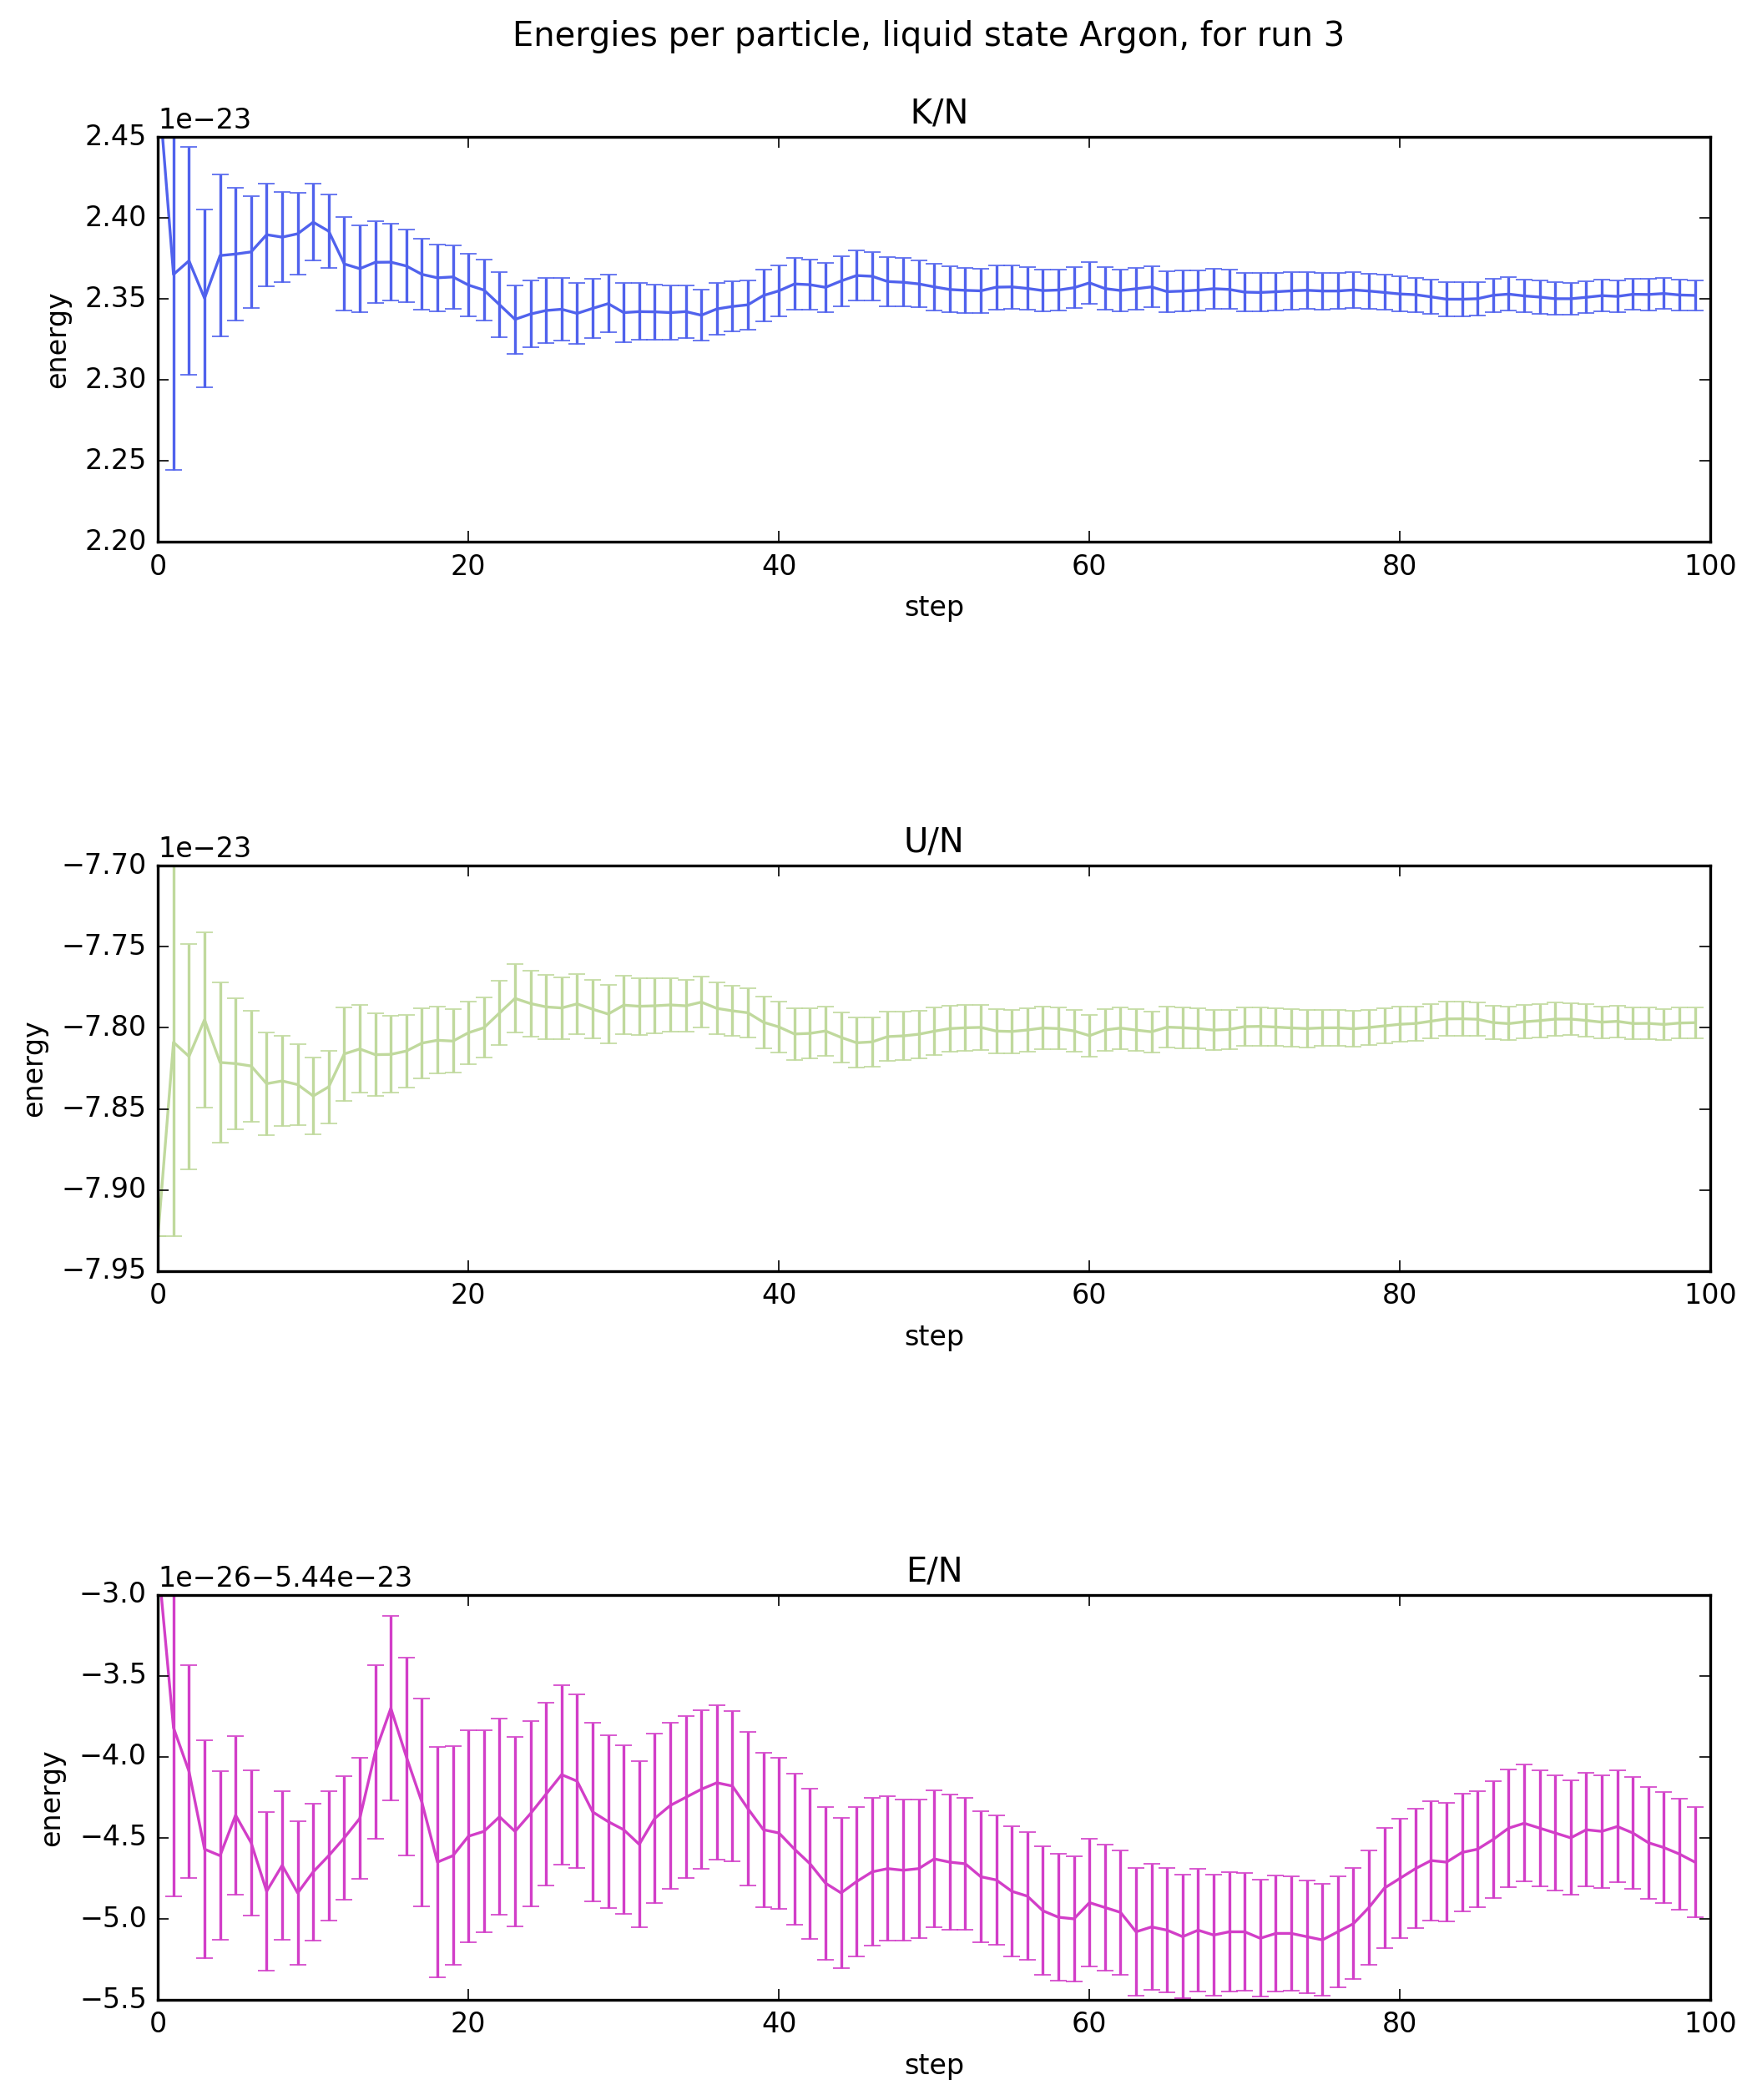

In [69]:
figure(num=None, figsize=(10, 12), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(311)
plt.errorbar(x, kin_en_1[:,0], yerr=kin_en_1[:,1], label='Kinetic Energy Kripton', color='#5062ed')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('Energies per particle, ' + state + ' state Argon, for run %i \n \n K/N' %runs)

plt.subplot(312)
plt.errorbar(x, pot_en_1[:,0], yerr=pot_en_1[:,1], label='Potential Energy Kripton', color='#c0d99d')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('U/N')

plt.subplot(313)
plt.errorbar(x, tot_en_1[:,0], yerr=tot_en_1[:,1], label='Total Energy Kripton', color='#d23ec8')
plt.title('E/N')
plt.xlabel('step')
plt.ylabel('energy')
plt.subplots_adjust(hspace=0.8)
#plt.legend(loc='best')

plt.savefig('plots/energies_argon_'+state+'.png')
plt.show()

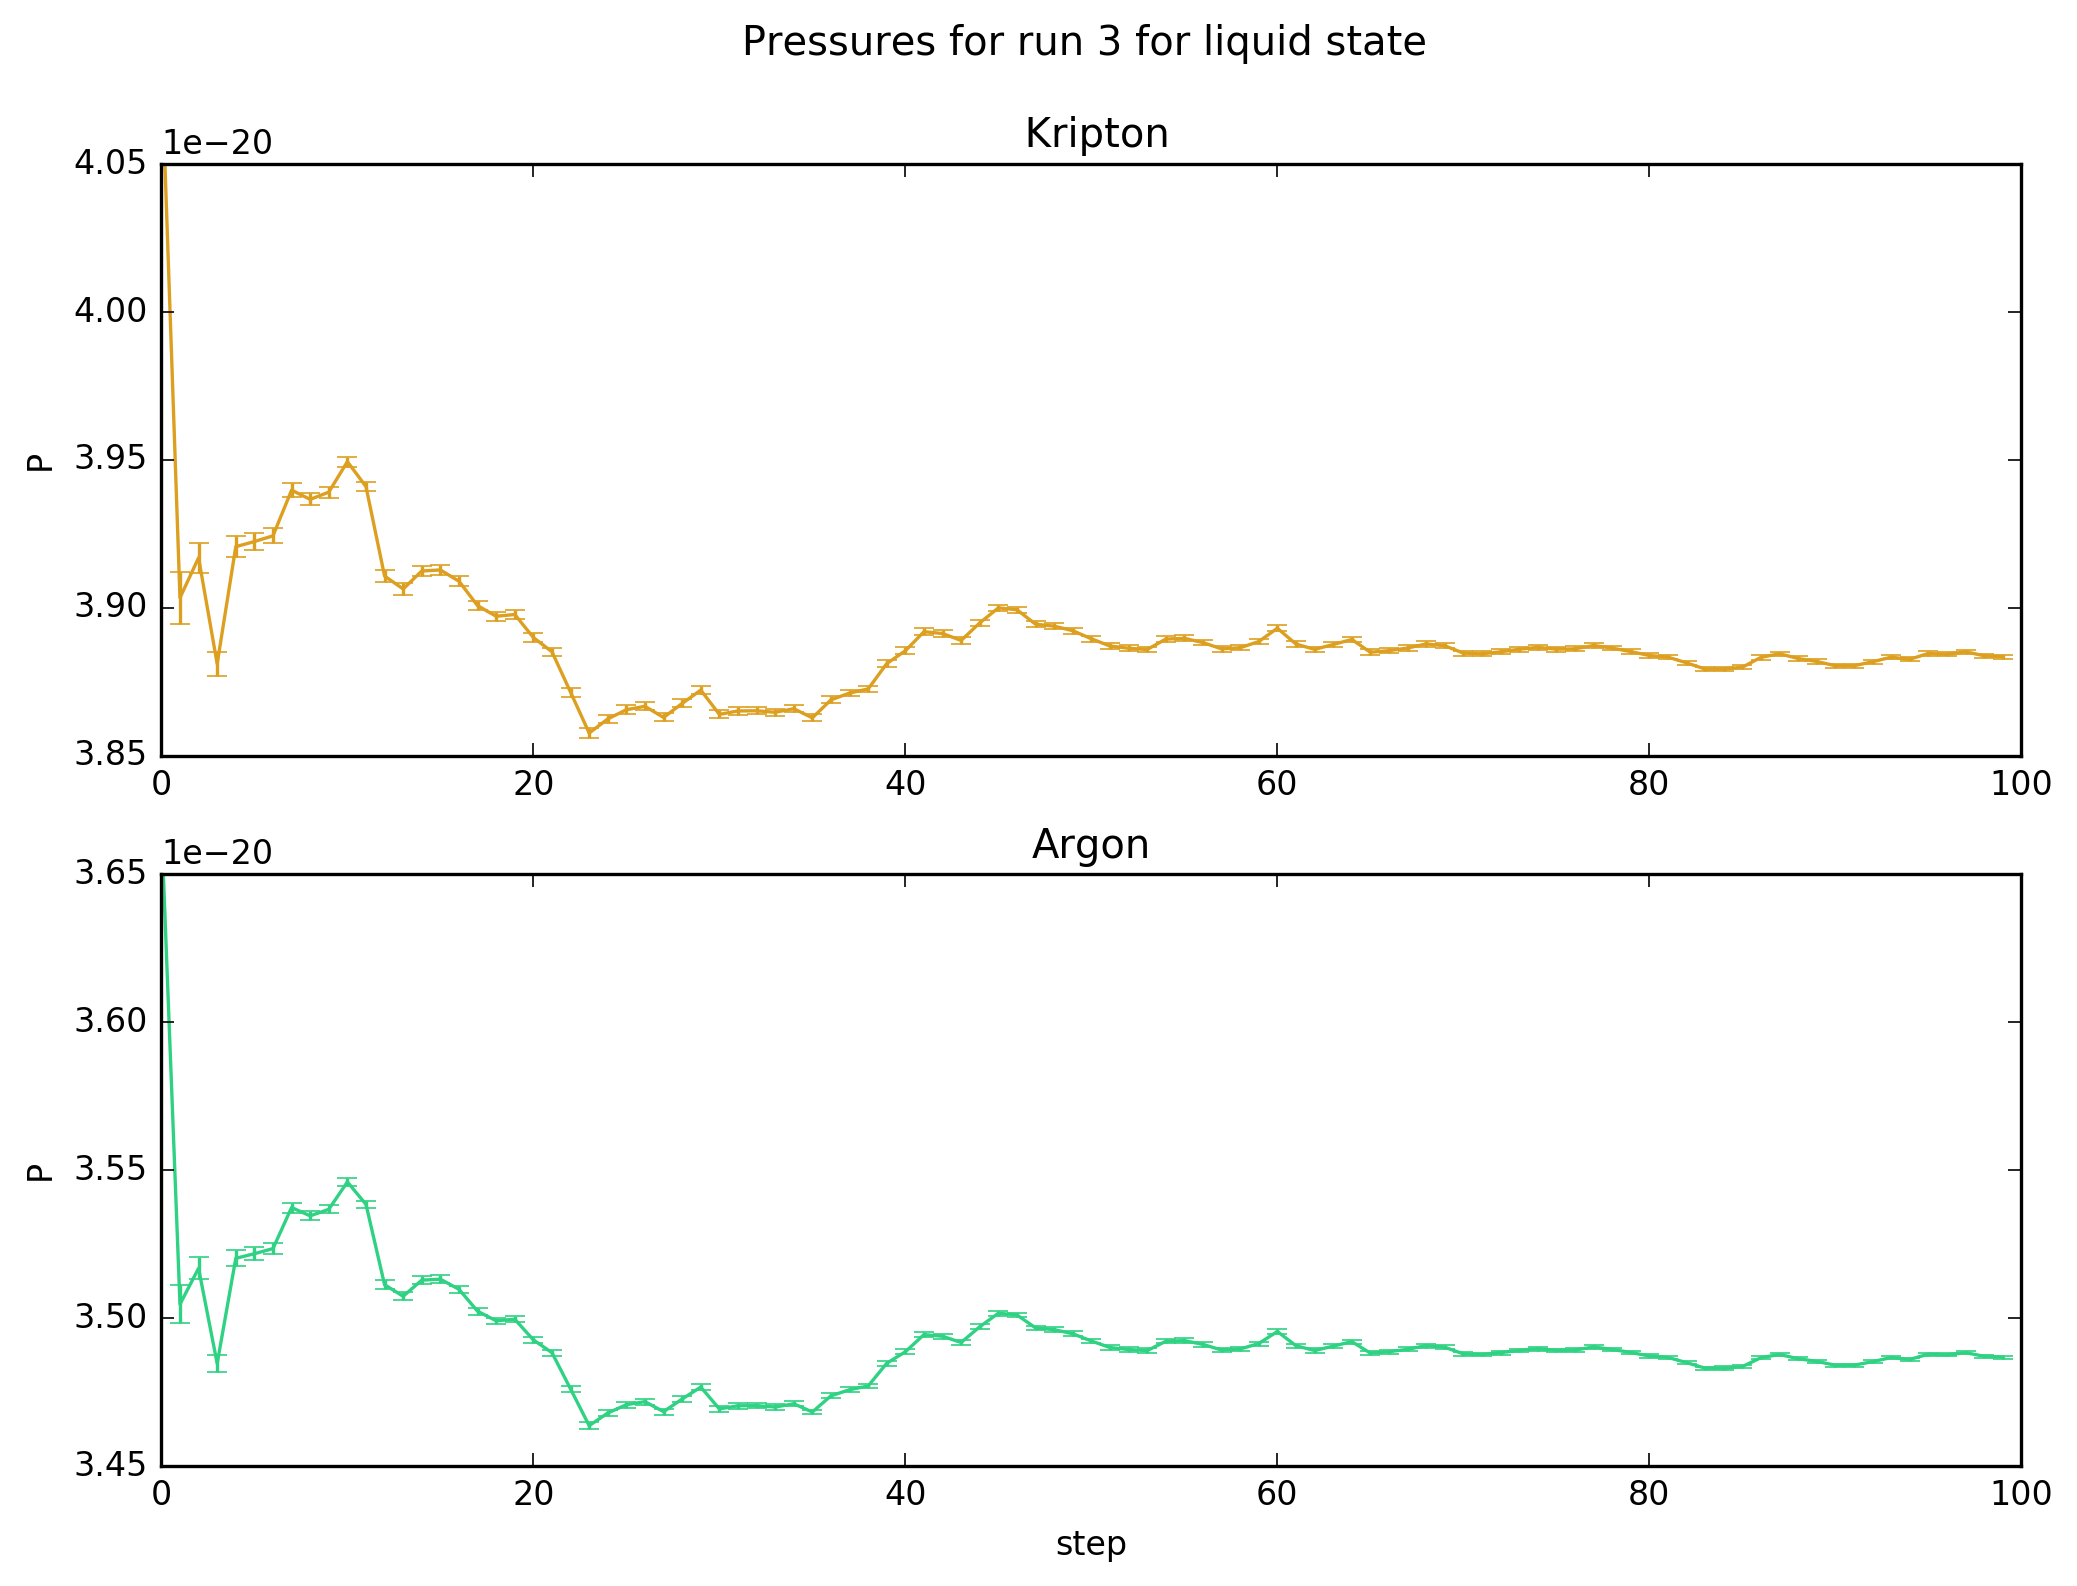

In [70]:
figure(num=None, figsize=(10, 7), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.errorbar(x, pres_0[:,0], yerr=pres_0[:,1], label='Kripton', color='#dc9f20')
plt.title(('Pressures for run %i for ' + state +' state \n \n Kripton') %runs)
plt.ylabel('P')

plt.subplot(212)
plt.errorbar(x, pres_1[:,0], yerr=pres_1[:,1], label='Argon', color='#2fd183')
plt.title('Argon')
#plt.axhline(1.1, label='Desired temperature', color='#2fd183')
plt.xlabel('step')
plt.ylabel('P')

#plt.ticklabel_format(useOffset=False, style='plain')

plt.savefig('plots/pressures_'+state+'.png')
plt.show()

------------- 
## Gas

In [71]:
element = ['Kripton', 'Argon']
#element = 'Kripton'
state = 'gas'

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [73]:
runs = np.loadtxt('run.dat')
runs = int(runs)
print('Number of runs:', runs)

Number of runs: 3


In [74]:
temp_0 = np.loadtxt(element[0] + '/' + state +'/ave_temp.out', skiprows=1)
temp_1 = np.loadtxt(element[1] + '/' + state +'/ave_temp.out', skiprows=1)

x = np.arange(len(temp_0))

kin_en_0 = np.loadtxt(element[0] + '/' + state +'/ave_ekin.out', skiprows=1)
kin_en_1 = np.loadtxt(element[1] + '/' + state +'/ave_ekin.out', skiprows=1)



pot_en_0 = np.loadtxt(element[0] + '/' + state +'/ave_epot.out', skiprows=1)
pot_en_1 = np.loadtxt(element[1] + '/' + state +'/ave_epot.out', skiprows=1)



tot_en_0 = np.loadtxt(element[0] + '/' + state +'/ave_etot.out', skiprows=1)
tot_en_1 = np.loadtxt(element[1] + '/' + state +'/ave_etot.out', skiprows=1)

pres_0 = np.loadtxt(element[0] + '/' + state +'/ave_pres.out', skiprows=1)
pres_1 = np.loadtxt(element[1] + '/' + state +'/ave_pres.out', skiprows=1)

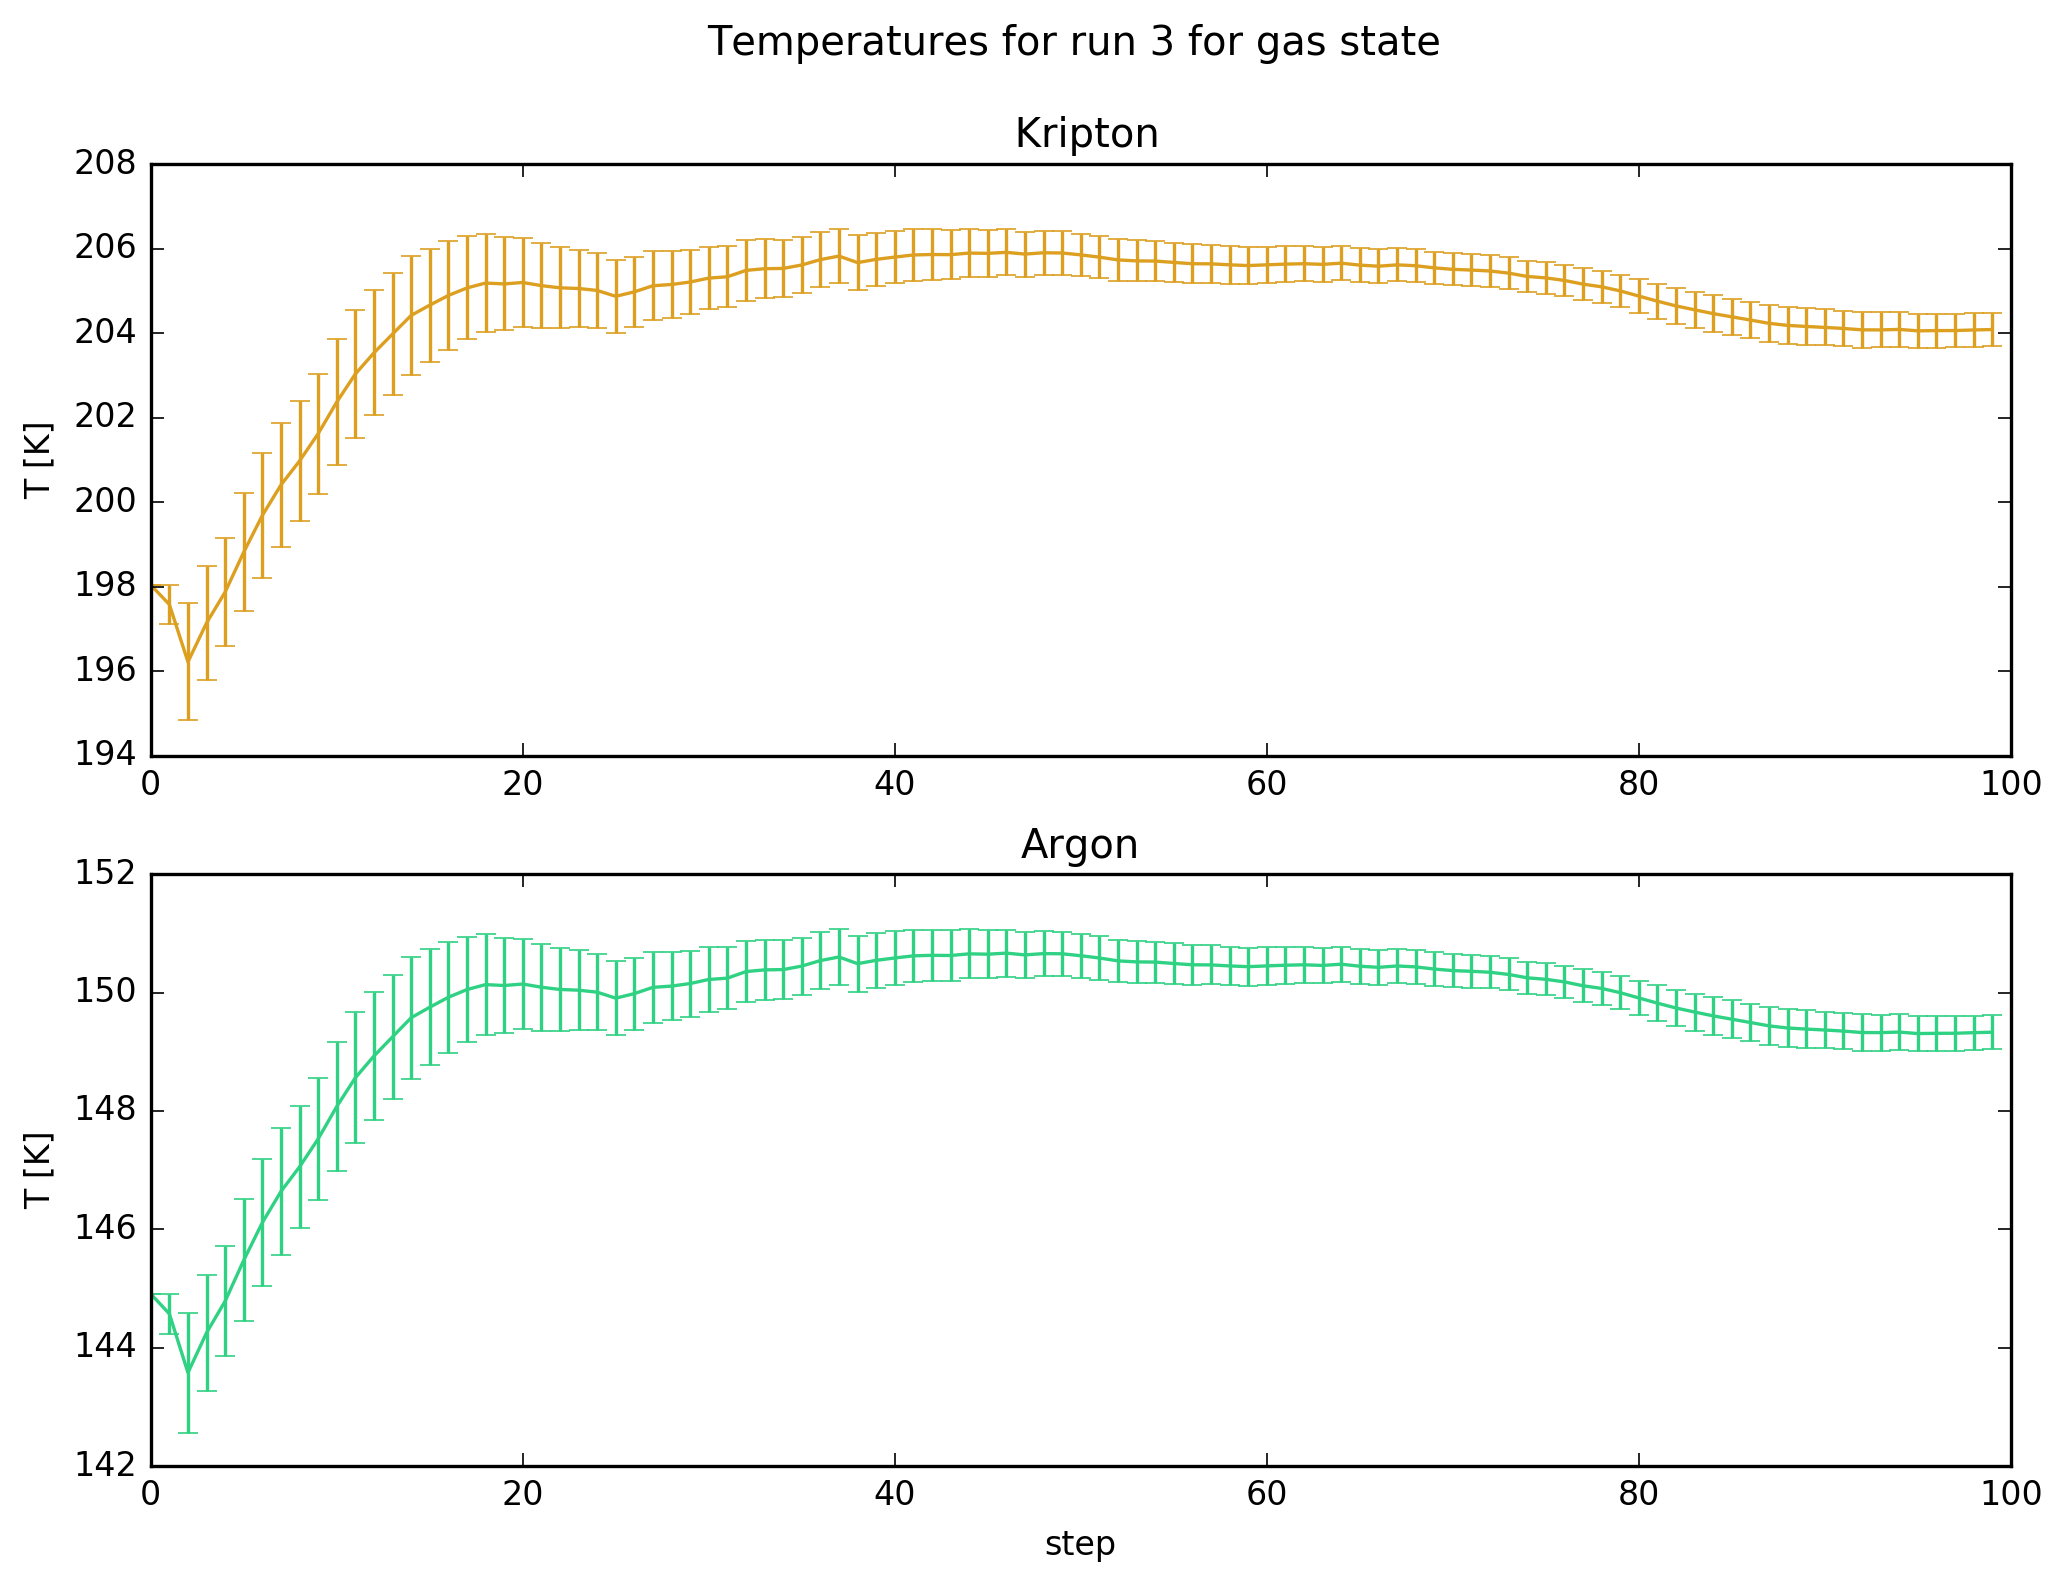

In [75]:
figure(num=None, figsize=(10, 7), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.errorbar(x, temp_0[:,0], yerr=temp_0[:,1], label='Kripton', color='#dc9f20')
plt.title(('Temperatures for run %i for ' + state +' state \n \n Kripton') %runs)
plt.ylabel('T [K]')

plt.subplot(212)
plt.errorbar(x, temp_1[:,0], yerr=temp_1[:,1], label='Argon', color='#2fd183')
plt.title('Argon')
#plt.axhline(1.1, label='Desired temperature', color='#2fd183')
plt.xlabel('step')
plt.ylabel('T [K]')

#plt.ticklabel_format(useOffset=False, style='plain')

plt.savefig('plots/temperatures_'+state+'.png')
plt.show()

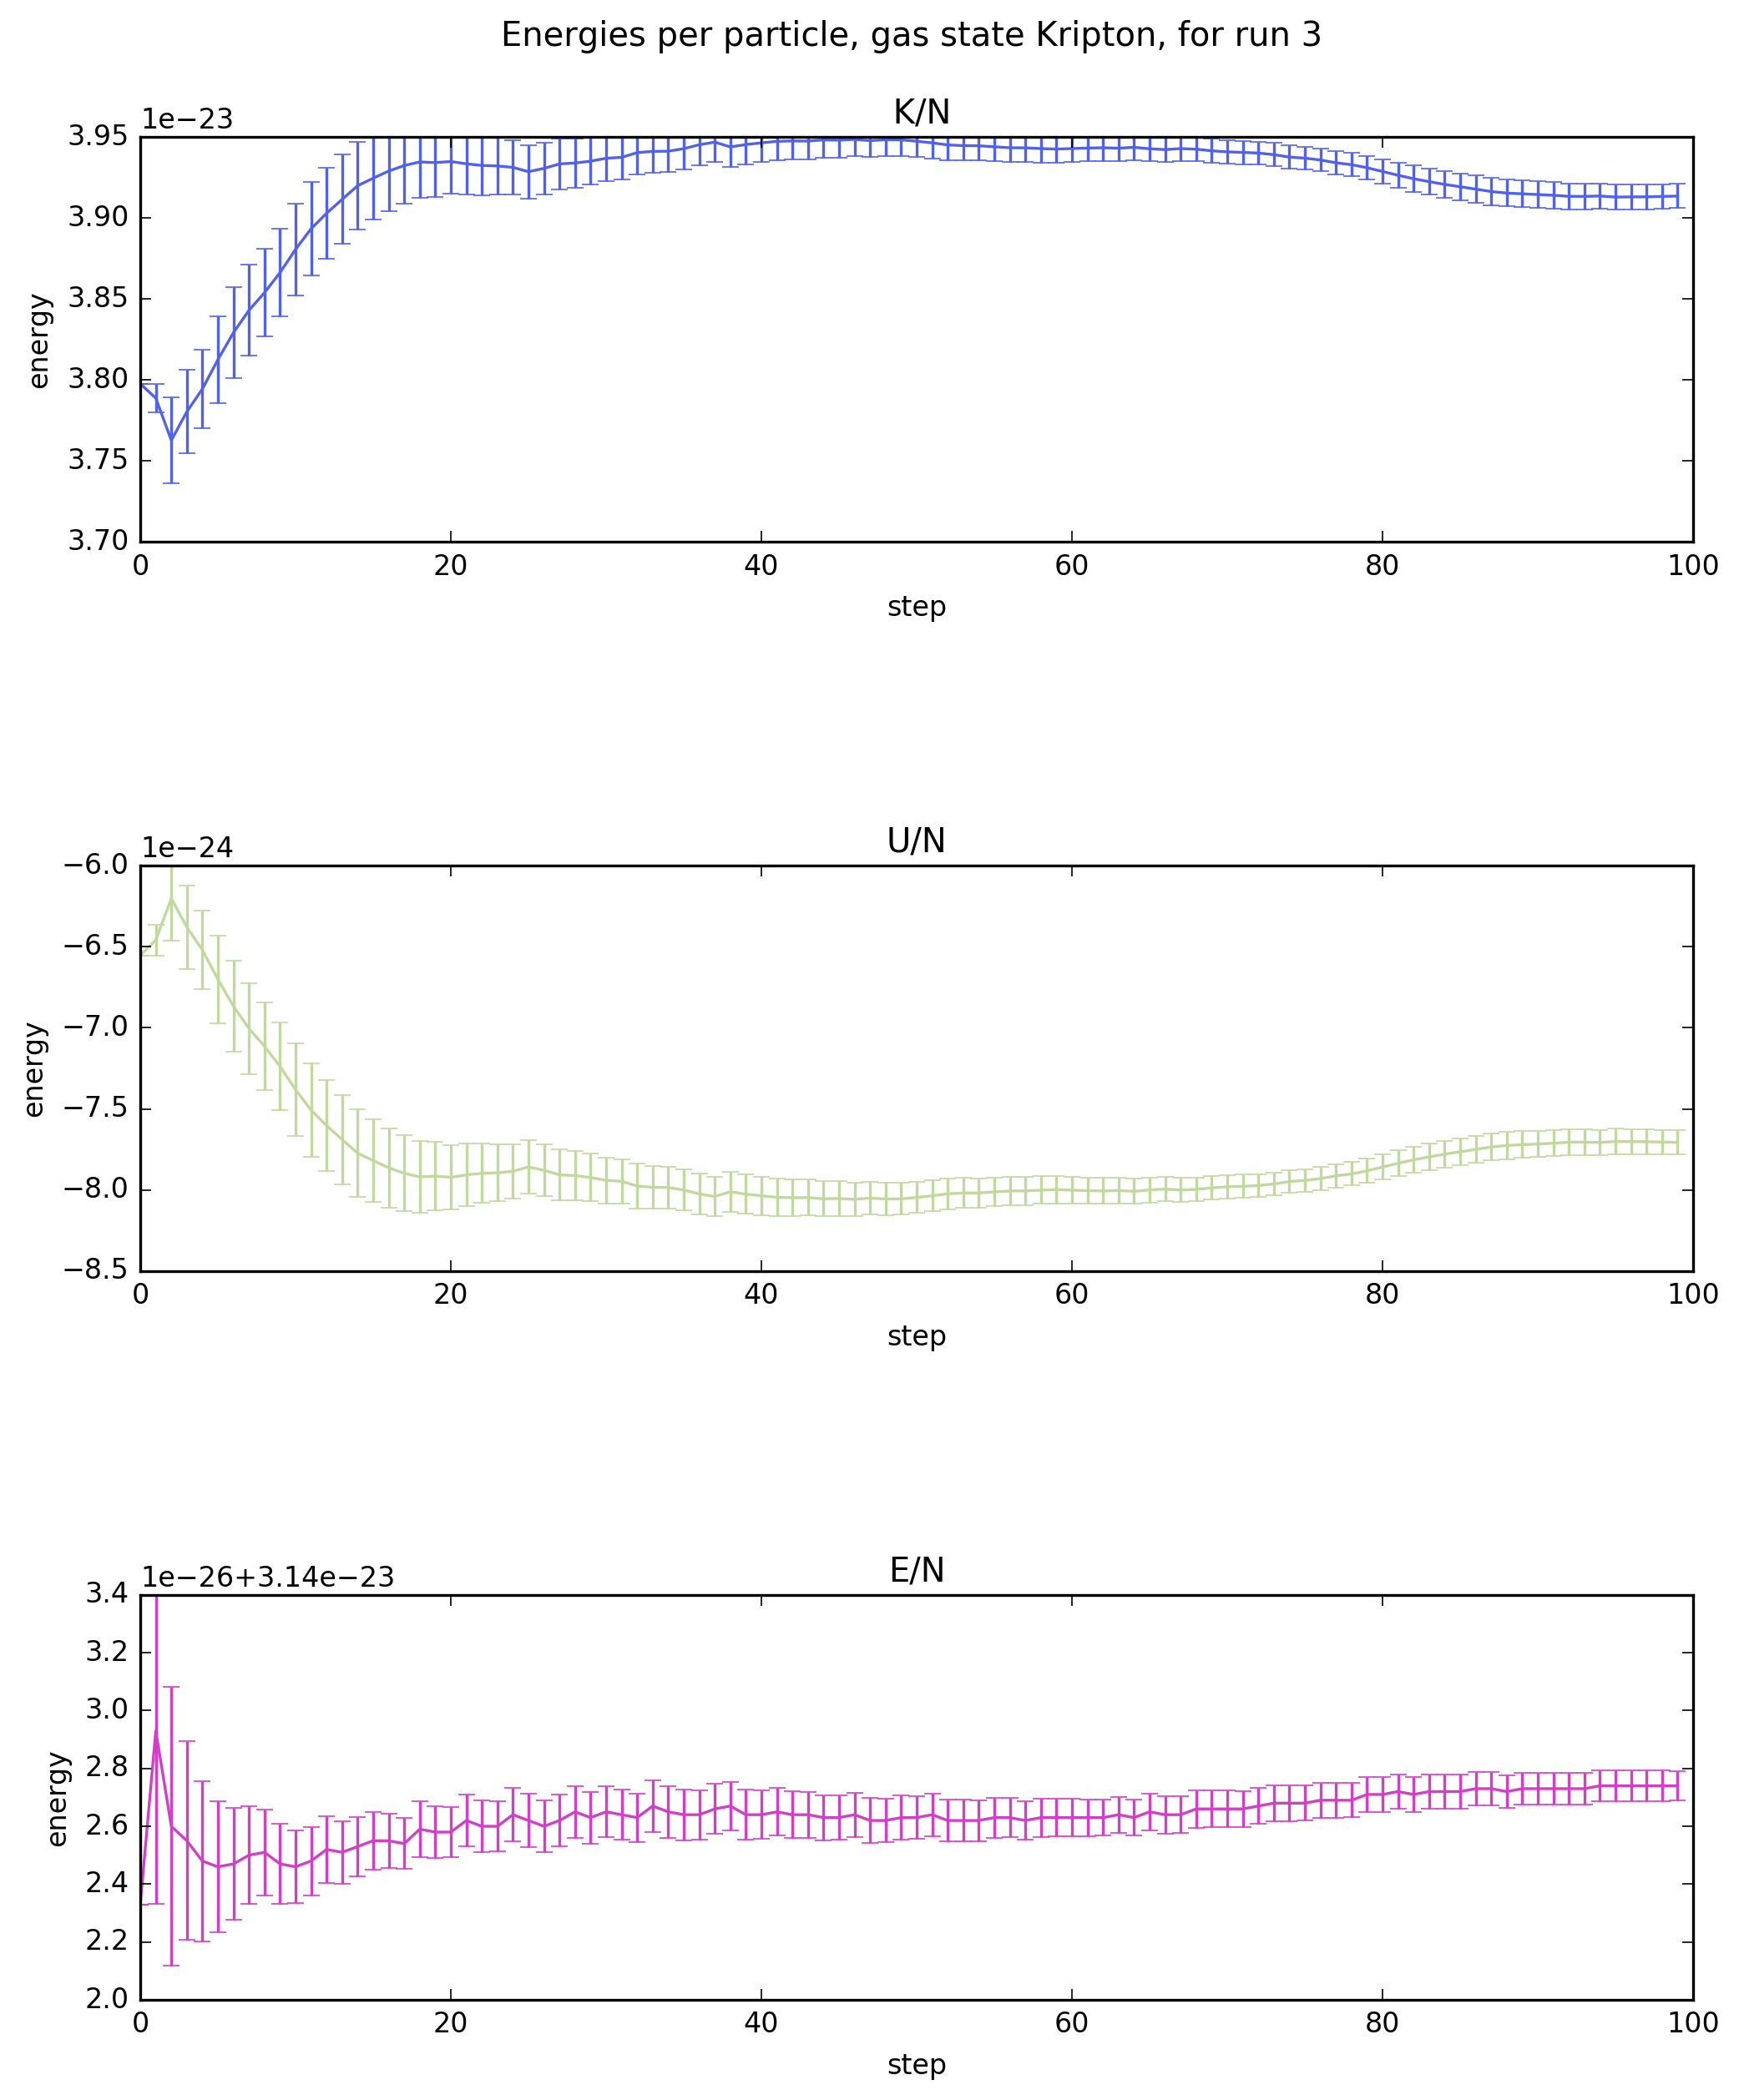

In [76]:
figure(num=None, figsize=(10, 12), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(311)
plt.errorbar(x, kin_en_0[:,0], yerr=kin_en_0[:,1], label='Kinetic Energy Kripton', color='#5062ed')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('Energies per particle, ' + state + ' state Kripton, for run %i \n \n K/N' %runs)

plt.subplot(312)
plt.errorbar(x, pot_en_0[:,0], yerr=pot_en_0[:,1], label='Potential Energy Kripton', color='#c0d99d')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('U/N')

plt.subplot(313)
plt.errorbar(x, tot_en_0[:,0], yerr=tot_en_0[:,1], label='Total Energy Kripton', color='#d23ec8')
plt.title('E/N')
plt.subplots_adjust(hspace=0.8)

plt.xlabel('step')
plt.ylabel('energy')
plt.savefig('plots/energies_kripton'+state+'.png')
plt.show()

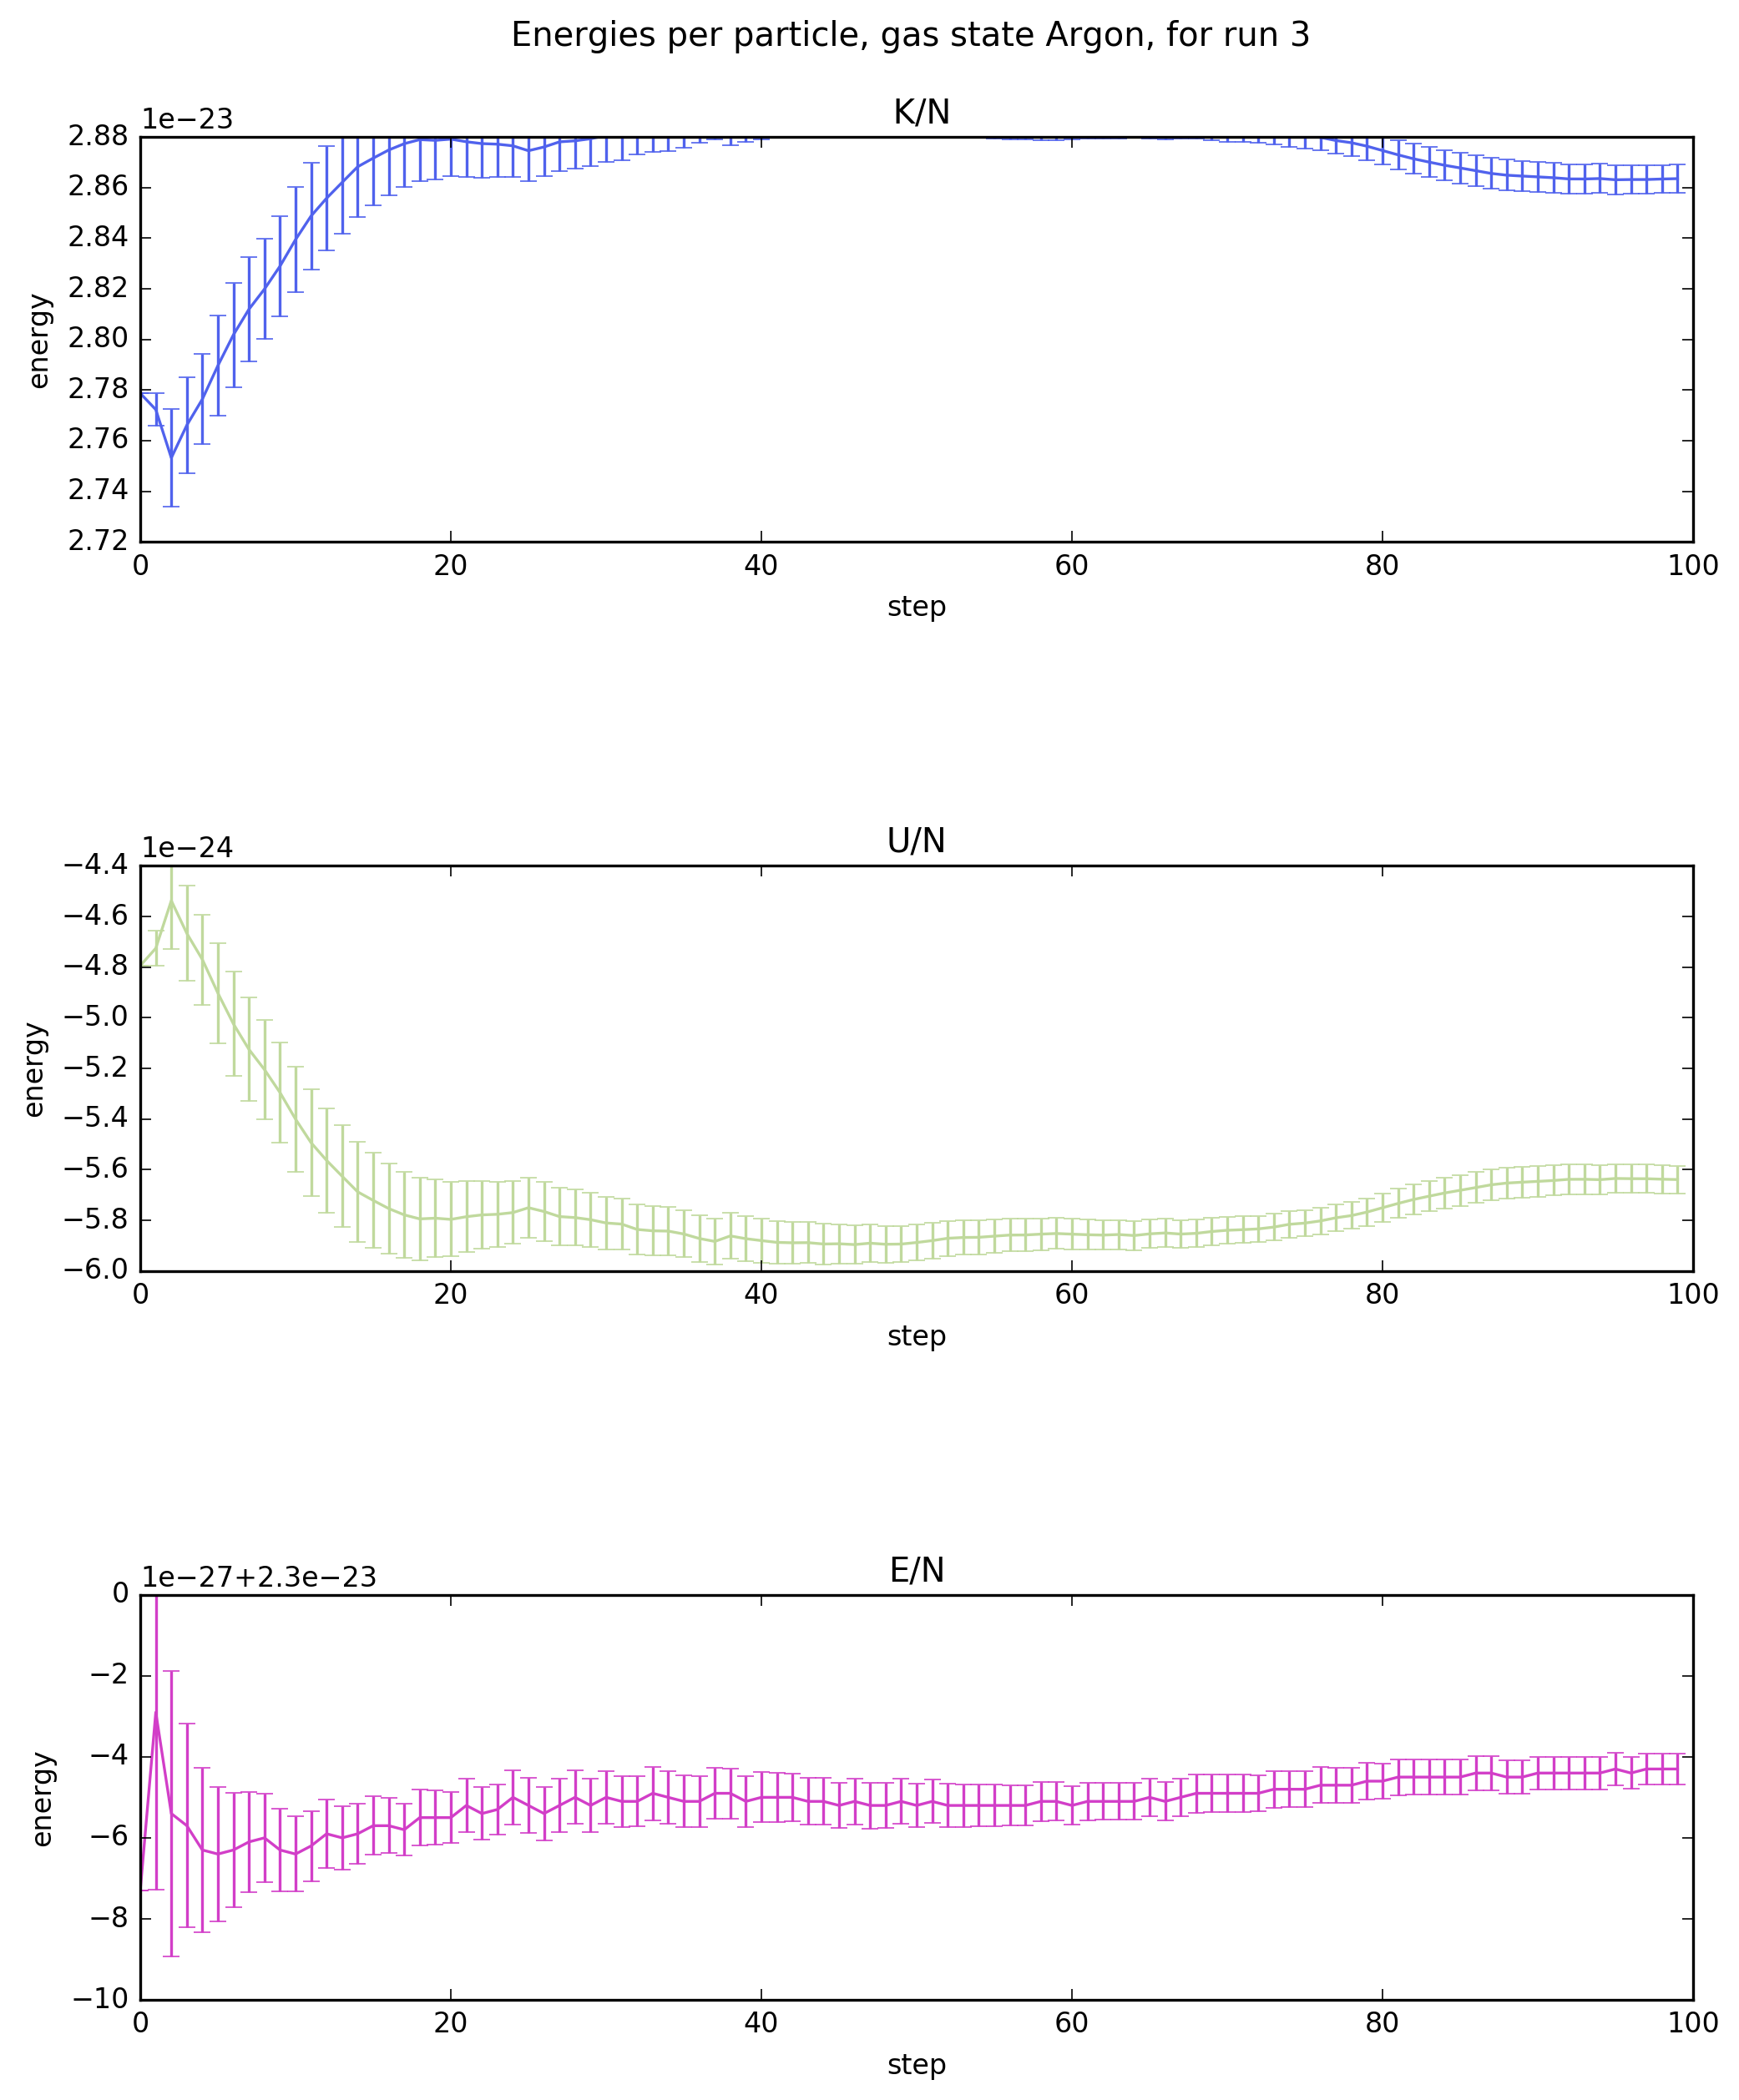

In [77]:
figure(num=None, figsize=(10, 12), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(311)
plt.errorbar(x, kin_en_1[:,0], yerr=kin_en_1[:,1], label='Kinetic Energy Kripton', color='#5062ed')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('Energies per particle, ' + state + ' state Argon, for run %i \n \n K/N' %runs)

plt.subplot(312)
plt.errorbar(x, pot_en_1[:,0], yerr=pot_en_1[:,1], label='Potential Energy Kripton', color='#c0d99d')
plt.xlabel('step')
plt.ylabel('energy')
plt.title('U/N')

plt.subplot(313)
plt.errorbar(x, tot_en_1[:,0], yerr=tot_en_1[:,1], label='Total Energy Kripton', color='#d23ec8')
plt.title('E/N')
plt.xlabel('step')
plt.ylabel('energy')
plt.subplots_adjust(hspace=0.8)
#plt.legend(loc='best')

plt.savefig('plots/energies_argon'+state+'.png')
plt.show()

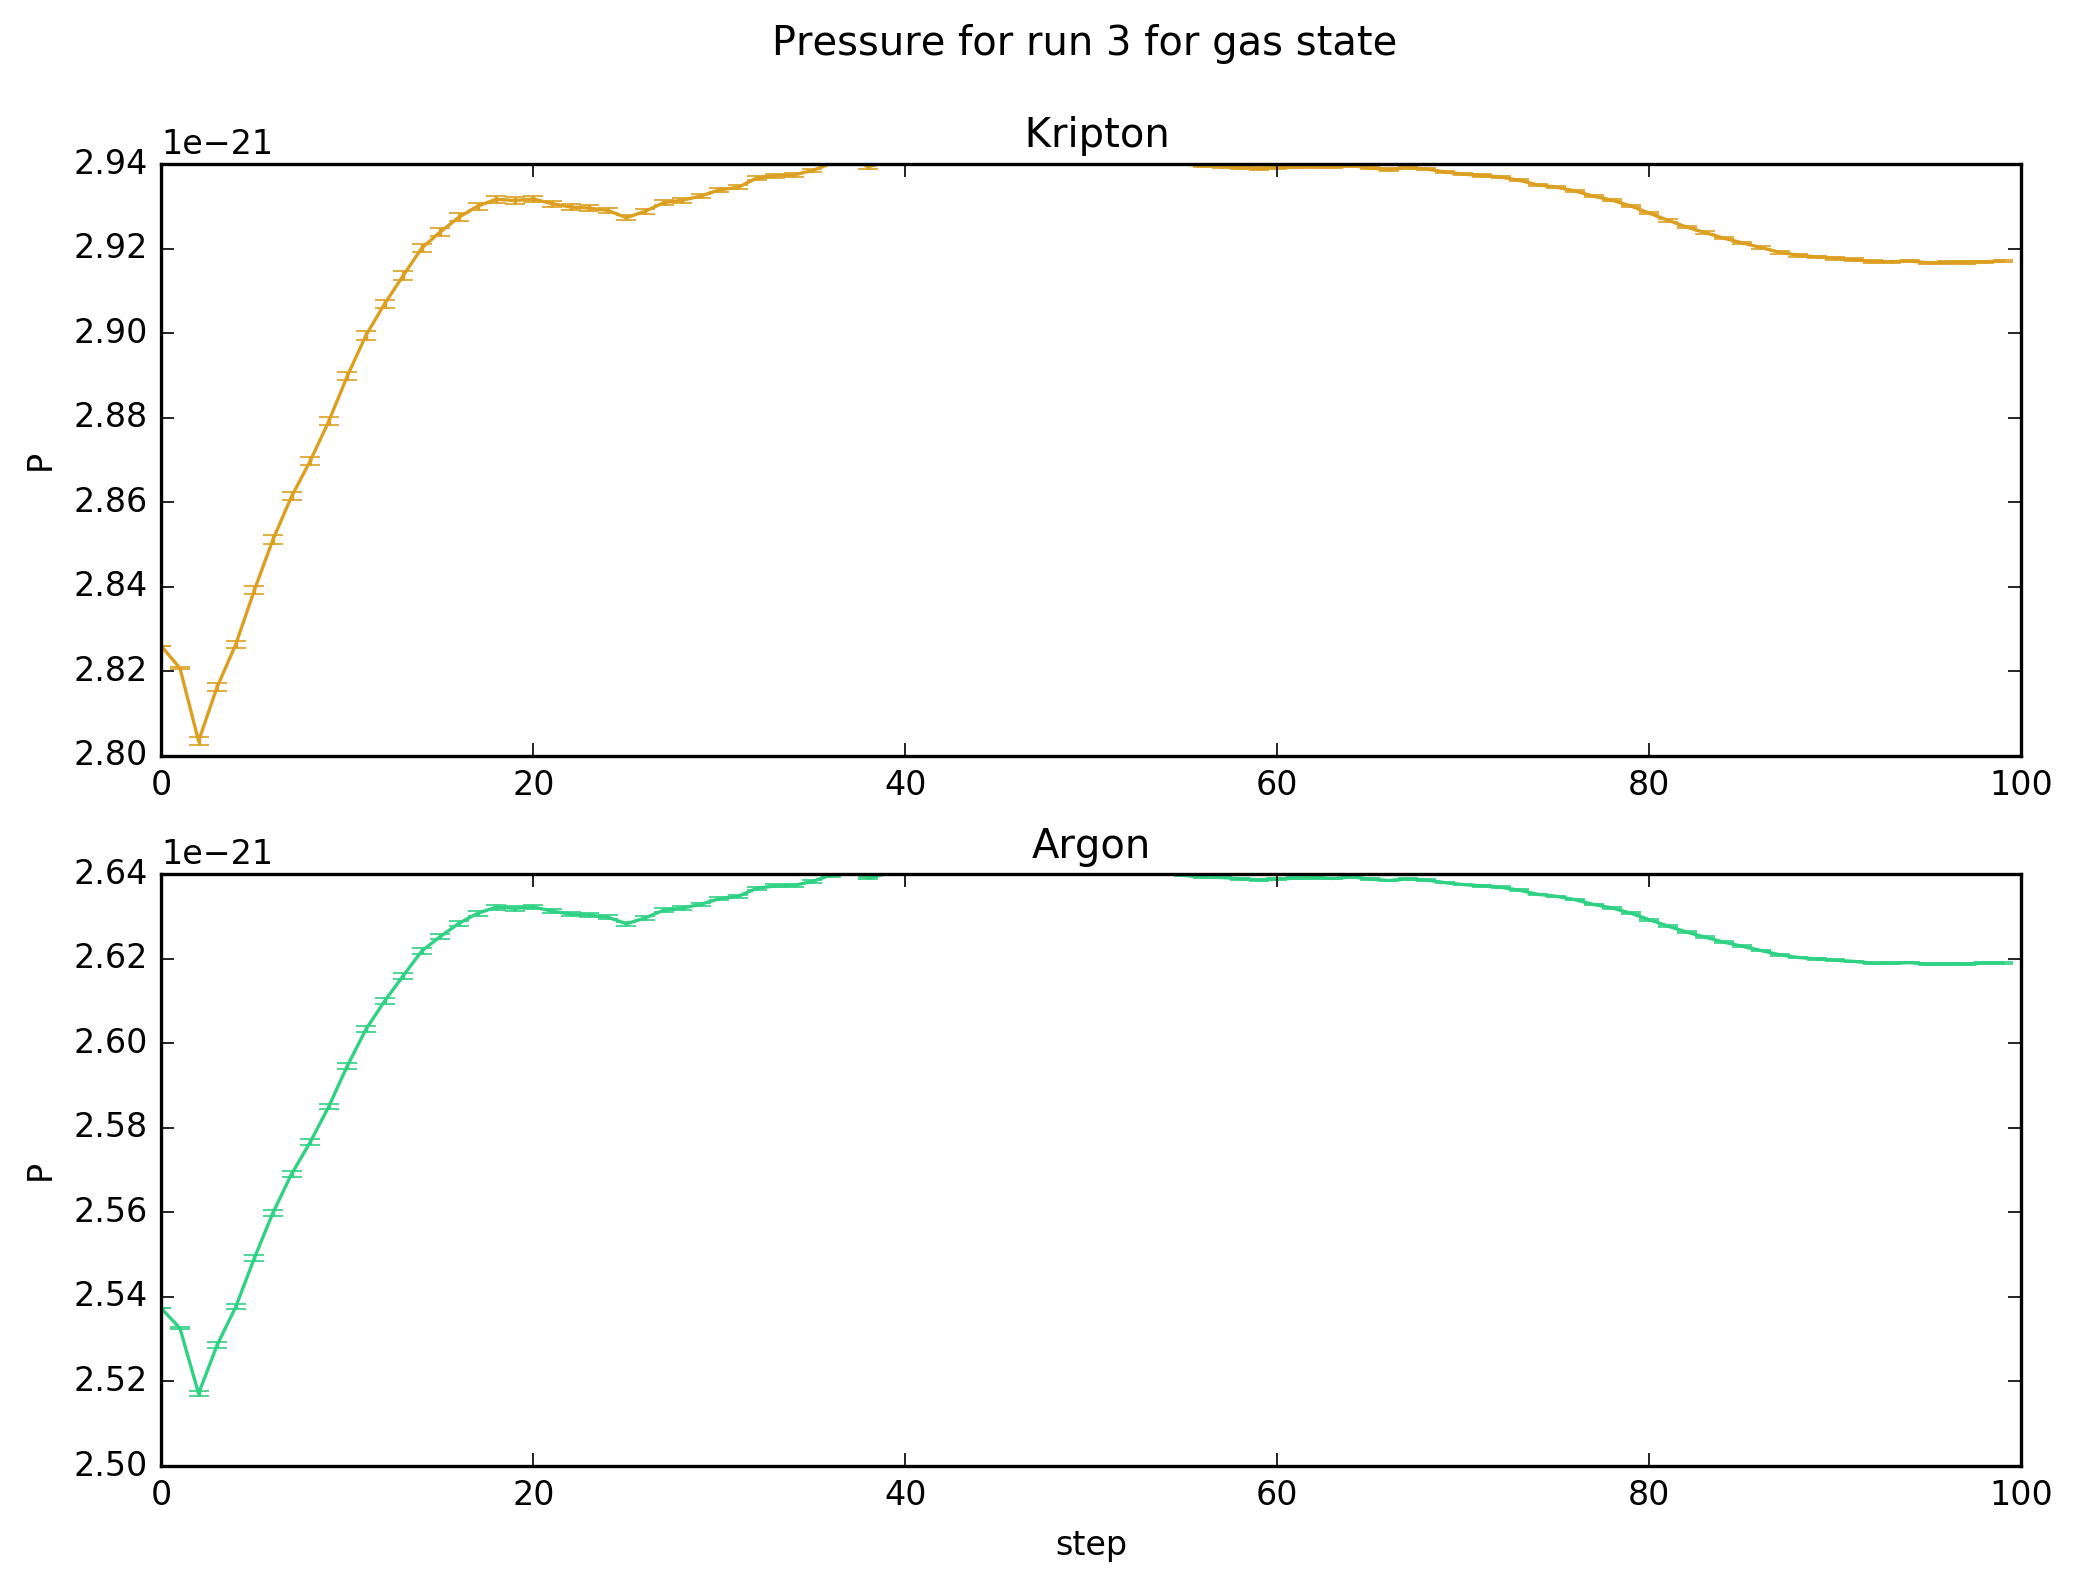

In [79]:
figure(num=None, figsize=(10, 7), dpi=240, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.errorbar(x, pres_0[:,0], yerr=pres_0[:,1], label='Kripton', color='#dc9f20')
plt.title(('Pressure for run %i for ' + state +' state \n \n Kripton') %runs)
plt.ylabel('P')

plt.subplot(212)
plt.errorbar(x, pres_1[:,0], yerr=pres_1[:,1], label='Argon', color='#2fd183')
plt.title('Argon')
#plt.axhline(1.1, label='Desired temperature', color='#2fd183')
plt.xlabel('step')
plt.ylabel('P')

#plt.ticklabel_format(useOffset=False, style='plain')

plt.savefig('plots/pressures_'+state+'.png')
plt.show()